# Alan Huang kaggle notebook. EDA is done across the feature engineering pipelines to ensure validity of each feature engineered

disclaimer: A portion of the code is written by AI tools like Chatgpt. However, all ideas are solely my own. I only use it for repetitive tasks to expedite my efficiency

## Data preprocessing (EDA and feature engineering)

### load and fillmissing (train and test separate, so no information leakage)

In [13]:
import pandas as pd

In [14]:
data_train = pd.read_csv('train.csv')

In [15]:
data_train.head()

,name,description,property_type,price,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,host_since,host_response_time,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,reviews
0,Bed-Stuy 2 Bed/2 Bath - Renovated,"Welcome to Bed-Stuy, Brooklyn! Our newly renov...",Entire rental unit,4,Bedford-Stuyvesant,Brooklyn,40.684560,-73.939870,2015-05-23 00:00:00,within a day,...,2024-08-10 00:00:00,5.00,5.00,4.97,5.0,5.0,4.71,4.94,0.52,"Barry's place was perfect. It was cute, modern..."
1,Victorian Flatbush Oasis,"Lovely nonsmoking annex in Brooklyn's ""secret ...",Private room in rental unit,3,Flatbush,Brooklyn,40.638991,-73.965739,2023-09-14 00:00:00,within an hour,...,2024-09-02 00:00:00,4.83,4.87,4.93,4.8,4.9,4.90,4.63,3.81,I booked this place last minute to attend a fu...
2,Bay Ridge Metroscape: Inviting NYC Studio Living,This studio presents unparalleled convenience ...,Entire rental unit,3,Fort Hamilton,Brooklyn,40.618810,-74.032380,2022-07-31 00:00:00,within an hour,...,2024-08-17 00:00:00,4.60,4.80,4.20,4.8,4.8,4.80,4.20,2.14,Great spot! Little far out but overall a great...
3,"New HDTV room, 20 minutes to Manhattan #724",- Furnished room in a newly renovated apartmen...,Private room in rental unit,0,Crown Heights,Brooklyn,40.673970,-73.953990,2012-08-11 00:00:00,within an hour,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Just What You Were Looking For! Pets Allowed,This modern property in Manhattan is just step...,Room in hotel,2,Midtown,Manhattan,40.747180,-73.985390,2014-12-23 00:00:00,within an hour,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='price', ylabel='Count'>

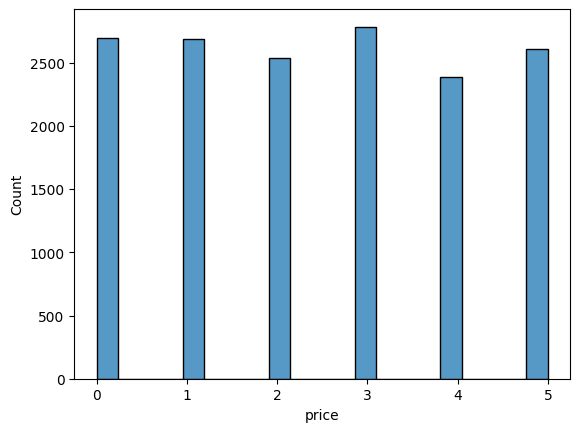

In [19]:
# use a bar plot for see the distribution of price
import seaborn as sns
sns.histplot(data_train['price'])

In [20]:
# Add the 'id' column with a value of -1 to discern it as the training set
data_train.insert(0, 'id', -1)
data_train.head()

,id,name,description,property_type,price,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,host_since,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,reviews
0,-1,Bed-Stuy 2 Bed/2 Bath - Renovated,"Welcome to Bed-Stuy, Brooklyn! Our newly renov...",Entire rental unit,4,Bedford-Stuyvesant,Brooklyn,40.684560,-73.939870,2015-05-23 00:00:00,...,2024-08-10 00:00:00,5.00,5.00,4.97,5.0,5.0,4.71,4.94,0.52,"Barry's place was perfect. It was cute, modern..."
1,-1,Victorian Flatbush Oasis,"Lovely nonsmoking annex in Brooklyn's ""secret ...",Private room in rental unit,3,Flatbush,Brooklyn,40.638991,-73.965739,2023-09-14 00:00:00,...,2024-09-02 00:00:00,4.83,4.87,4.93,4.8,4.9,4.90,4.63,3.81,I booked this place last minute to attend a fu...
2,-1,Bay Ridge Metroscape: Inviting NYC Studio Living,This studio presents unparalleled convenience ...,Entire rental unit,3,Fort Hamilton,Brooklyn,40.618810,-74.032380,2022-07-31 00:00:00,...,2024-08-17 00:00:00,4.60,4.80,4.20,4.8,4.8,4.80,4.20,2.14,Great spot! Little far out but overall a great...
3,-1,"New HDTV room, 20 minutes to Manhattan #724",- Furnished room in a newly renovated apartmen...,Private room in rental unit,0,Crown Heights,Brooklyn,40.673970,-73.953990,2012-08-11 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1,Just What You Were Looking For! Pets Allowed,This modern property in Manhattan is just step...,Room in hotel,2,Midtown,Manhattan,40.747180,-73.985390,2014-12-23 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
data_test = pd.read_csv('test.csv')

In [22]:
data_test.head()

,id,name,description,property_type,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,host_since,host_response_time,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,reviews
0,3917,"Beautiful 3 bedroom House in Woodside, Queens",Beautiful 3 bedroom house in the heart of Wood...,Entire home,Woodside,Queens,40.744620,-73.904520,2013-05-07 00:00:00,NaN,...,2023-09-17 00:00:00,5.00,5.00,4.96,5.00,5.00,4.96,4.96,1.22,Home was perfect and exactly what we needed to...
1,1885,"Queens HDTV Room 13 mins to Manhattan, 3 bath ...",Bright bedroom in the best part of Long Island...,Private room in rental unit,Long Island City,Queens,40.753407,-73.934995,2012-08-11 00:00:00,within an hour,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1305,Lovely Bright & Spacious Loft in Brooklyn.,"Our loft is spacious and calm, filled with nat...",Entire loft,Crown Heights,Brooklyn,40.677090,-73.943810,2012-05-14 00:00:00,NaN,...,2022-10-31 00:00:00,4.94,5.00,4.90,4.90,4.97,4.68,4.90,0.88,I would give this place 10 stars if it were op...
3,19328,Classic Petite Room SB #17 - Furnished Studio,"Extended stay hotel , all rooms are fully furn...",Entire rental unit,Upper West Side,Manhattan,40.795760,-73.971570,2021-04-05 00:00:00,within a day,...,2024-08-21 00:00:00,4.75,4.50,4.75,5.00,4.50,5.00,4.50,0.26,The front-desk staff was absolutely wonderful ...
4,16511,Petit chalet with secret garden,Small loft type of apartment on ground floor w...,Entire rental unit,Williamsburg,Brooklyn,40.713590,-73.955400,2014-10-07 00:00:00,within a few hours,...,2024-08-31 00:00:00,4.82,4.89,4.69,4.97,4.96,4.94,4.73,1.35,I really enjoyed staying at Kanae's place. It ...


In [23]:
# Add the 'id' column with a value of -1, to dicern that it is the test set
data_test.insert(4, 'price', -1)

# Display the updated DataFrame
data_test.head()

,id,name,description,property_type,price,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,host_since,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,reviews
0,3917,"Beautiful 3 bedroom House in Woodside, Queens",Beautiful 3 bedroom house in the heart of Wood...,Entire home,-1,Woodside,Queens,40.744620,-73.904520,2013-05-07 00:00:00,...,2023-09-17 00:00:00,5.00,5.00,4.96,5.00,5.00,4.96,4.96,1.22,Home was perfect and exactly what we needed to...
1,1885,"Queens HDTV Room 13 mins to Manhattan, 3 bath ...",Bright bedroom in the best part of Long Island...,Private room in rental unit,-1,Long Island City,Queens,40.753407,-73.934995,2012-08-11 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1305,Lovely Bright & Spacious Loft in Brooklyn.,"Our loft is spacious and calm, filled with nat...",Entire loft,-1,Crown Heights,Brooklyn,40.677090,-73.943810,2012-05-14 00:00:00,...,2022-10-31 00:00:00,4.94,5.00,4.90,4.90,4.97,4.68,4.90,0.88,I would give this place 10 stars if it were op...
3,19328,Classic Petite Room SB #17 - Furnished Studio,"Extended stay hotel , all rooms are fully furn...",Entire rental unit,-1,Upper West Side,Manhattan,40.795760,-73.971570,2021-04-05 00:00:00,...,2024-08-21 00:00:00,4.75,4.50,4.75,5.00,4.50,5.00,4.50,0.26,The front-desk staff was absolutely wonderful ...
4,16511,Petit chalet with secret garden,Small loft type of apartment on ground floor w...,Entire rental unit,-1,Williamsburg,Brooklyn,40.713590,-73.955400,2014-10-07 00:00:00,...,2024-08-31 00:00:00,4.82,4.89,4.69,4.97,4.96,4.94,4.73,1.35,I really enjoyed staying at Kanae's place. It ...


In [24]:
df = data_train.copy()

In [25]:
# Training and development set separately imputed to avoid overfitting on the training set
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Add 'original_index' column to preserve the original order after concatenation
df = df.reset_index(drop=False)

# Split the data into train and test sets (80:20 split)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# =======================
# Data Imputation Begins
# =======================

# 1. Handle 'first_review' and 'last_review' columns
placeholder_date = pd.Timestamp("2000-01-01")  # Placeholder date for missing values

# For df_train
df_train['first_review'] = pd.to_datetime(df_train['first_review'], errors='coerce').fillna(placeholder_date)
df_train['last_review'] = pd.to_datetime(df_train['last_review'], errors='coerce').fillna(placeholder_date)

# For df_test
df_test['first_review'] = pd.to_datetime(df_test['first_review'], errors='coerce').fillna(placeholder_date)
df_test['last_review'] = pd.to_datetime(df_test['last_review'], errors='coerce').fillna(placeholder_date)

# 2. Handle 'review_scores_*' columns
review_score_columns = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value'
]

# Ensure the columns are numeric
for col in review_score_columns:
    df_train[col] = pd.to_numeric(df_train[col], errors='coerce')
    df_test[col] = pd.to_numeric(df_test[col], errors='coerce')

# Compute medians from df_train
medians = df_train[review_score_columns].median()

# Fill missing values in df_train and df_test using medians from df_train
df_train[review_score_columns] = df_train[review_score_columns].fillna(medians)
df_test[review_score_columns] = df_test[review_score_columns].fillna(medians)

# 3. Handle 'reviews_per_month' column
df_train['reviews_per_month'] = df_train['reviews_per_month'].fillna(0)
df_test['reviews_per_month'] = df_test['reviews_per_month'].fillna(0)

# 4. Handle 'reviews' column
df_train['reviews'] = df_train['reviews'].fillna("")
df_test['reviews'] = df_test['reviews'].fillna("")

# 5. Handle 'host_response_time' column
df_train['host_response_time'] = df_train['host_response_time'].fillna("others")
df_test['host_response_time'] = df_test['host_response_time'].fillna("others")

# Apply mapping
response_time_mapping = lambda x: x if x in ["within an hour", "within a few hours"] else "others"
df_train['host_response_time'] = df_train['host_response_time'].apply(response_time_mapping)
df_test['host_response_time'] = df_test['host_response_time'].apply(response_time_mapping)

# 6. Handle 'host_response_rate' and 'host_acceptance_rate' columns

# Function to convert percentage strings to numeric values
def convert_to_numeric(series):
    return pd.to_numeric(series.astype(str).str.rstrip('%'), errors='coerce')

# Convert to numeric
df_train['host_response_rate'] = convert_to_numeric(df_train['host_response_rate'])
df_test['host_response_rate'] = convert_to_numeric(df_test['host_response_rate'])

df_train['host_acceptance_rate'] = convert_to_numeric(df_train['host_acceptance_rate'])
df_test['host_acceptance_rate'] = convert_to_numeric(df_test['host_acceptance_rate'])

# Compute medians from df_train
response_rate_median = df_train['host_response_rate'].median()
acceptance_rate_median = df_train['host_acceptance_rate'].median()

# Fill missing values
df_train['host_response_rate'] = df_train['host_response_rate'].fillna(response_rate_median)
df_test['host_response_rate'] = df_test['host_response_rate'].fillna(response_rate_median)

df_train['host_acceptance_rate'] = df_train['host_acceptance_rate'].fillna(acceptance_rate_median)
df_test['host_acceptance_rate'] = df_test['host_acceptance_rate'].fillna(acceptance_rate_median)

# 7. Handle 'host_is_superhost' column
df_train['host_is_superhost'] = df_train['host_is_superhost'].fillna("unknown")
df_test['host_is_superhost'] = df_test['host_is_superhost'].fillna("unknown")

# 8. Handle 'bathrooms', 'bedrooms', and 'beds' columns

# Ensure the columns are numeric
df_train['bathrooms'] = pd.to_numeric(df_train['bathrooms'], errors='coerce')
df_test['bathrooms'] = pd.to_numeric(df_test['bathrooms'], errors='coerce')

df_train['bedrooms'] = pd.to_numeric(df_train['bedrooms'], errors='coerce')
df_test['bedrooms'] = pd.to_numeric(df_test['bedrooms'], errors='coerce')

df_train['beds'] = pd.to_numeric(df_train['beds'], errors='coerce')
df_test['beds'] = pd.to_numeric(df_test['beds'], errors='coerce')

# Compute medians from df_train
bathrooms_median = df_train['bathrooms'].median()
bedrooms_median = df_train['bedrooms'].median()
beds_median = df_train['beds'].median()

# Fill missing values
df_train['bathrooms'] = df_train['bathrooms'].fillna(bathrooms_median)
df_test['bathrooms'] = df_test['bathrooms'].fillna(bathrooms_median)

df_train['bedrooms'] = df_train['bedrooms'].fillna(bedrooms_median)
df_test['bedrooms'] = df_test['bedrooms'].fillna(bedrooms_median)

df_train['beds'] = df_train['beds'].fillna(beds_median)
df_test['beds'] = df_test['beds'].fillna(beds_median)

# 9. Handle 'has_availability' column
df_train['has_availability'] = df_train['has_availability'].fillna("true")
df_test['has_availability'] = df_test['has_availability'].fillna("true")

# 10. Handle 'bathrooms_text' column
df_train['bathrooms_text'] = df_train['bathrooms_text'].fillna("unknown")
df_test['bathrooms_text'] = df_test['bathrooms_text'].fillna("unknown")

# 11. Handle 'description' column
df_train['description'] = df_train['description'].fillna("No description provided")
df_test['description'] = df_test['description'].fillna("No description provided")

# Create binary indicator for missing descriptions
df_train['description_missing'] = df_train['description'].apply(
    lambda x: 1 if x == "No description provided" else 0
)
df_test['description_missing'] = df_test['description'].apply(
    lambda x: 1 if x == "No description provided" else 0
)

# =======================
# Data Imputation Ends
# =======================

# Concatenate the train and test sets back together
df_processed = pd.concat([df_train, df_test], axis=0)

# Sort by the original index to preserve the original order
df_processed = df_processed.sort_values('index')

# Drop the 'index' column if it's no longer needed
df_processed = df_processed.drop('index', axis=1)

# Reset index if desired
df_processed = df_processed.reset_index(drop=True)
df = df_processed.copy()

In [26]:
data_train = df.copy()
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15696 entries, 0 to 15695
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            15696 non-null  int64         
 1   name                                          15696 non-null  object        
 2   description                                   15696 non-null  object        
 3   property_type                                 15696 non-null  object        
 4   price                                         15696 non-null  int64         
 5   neighbourhood_cleansed                        15696 non-null  object        
 6   neighbourhood_group_cleansed                  15696 non-null  object        
 7   latitude                                      15696 non-null  float64       
 8   longitude                                     15696 non-null  floa

In [27]:
df = data_test.copy()

In [28]:
import pandas as pd
import numpy as np

# do imputation for test set separately
# Handle missing values for review-related columns

# 1. 'first_review' and 'last_review': Fill missing with a placeholder date or null
placeholder_date = pd.Timestamp("2000-01-01")  # Placeholder date for missing values
df['first_review'] = pd.to_datetime(df['first_review'], errors='coerce').fillna(placeholder_date)
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce').fillna(placeholder_date)

# 2. 'review_scores_*': Fill missing values with the mean or a placeholder
review_score_columns = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value'
]

# Replace missing values with the mean of each column
for col in review_score_columns:
    df[col] = df[col].fillna(df[col].median())

# 3. 'reviews_per_month': Replace missing values with 0 (no reviews)
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# 4. 'reviews': Replace missing values with an empty string
df['reviews'] = df['reviews'].fillna("")
df['host_response_time'] = df['host_response_time'].fillna("others")

df['host_response_time'] = df['host_response_time'].apply(
    lambda x: x if x in ["within an hour", "within a few hours"] else "others"
)

# For 'host_response_rate' and 'host_acceptance_rate'
# Impute missing values with the median
df['host_response_rate'] = df['host_response_rate'].fillna(df['host_response_rate'].median())
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].median())

# For 'host_is_superhost'
# Fill missing values with "unknown"
df['host_is_superhost'] = df['host_is_superhost'].fillna("unknown")

# For 'bathrooms', 'bedrooms', and 'beds': Fill missing values with the median
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())
df['beds'] = df['beds'].fillna(df['beds'].median())

# For 'has_availability': Fill missing values with "true"
df['has_availability'] = df['has_availability'].fillna("true")
# For 'bathrooms_text': Fill missing values with "unknown"
df['bathrooms_text'] = df['bathrooms_text'].fillna("unknown")

# Fill missing values with a placeholder
df['description'] = df['description'].fillna("No description provided")

# Create a binary indicator for missing descriptions
df['description_missing'] = df['description'].apply(lambda x: 1 if x == "No description provided" else 0)

In [29]:
data_test = df.copy()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            6727 non-null   int64         
 1   name                                          6727 non-null   object        
 2   description                                   6727 non-null   object        
 3   property_type                                 6727 non-null   object        
 4   price                                         6727 non-null   int64         
 5   neighbourhood_cleansed                        6727 non-null   object        
 6   neighbourhood_group_cleansed                  6727 non-null   object        
 7   latitude                                      6727 non-null   float64       
 8   longitude                                     6727 non-null   float6

In [48]:
# concat data_train and data_test
df = pd.concat([data_train, data_test], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22423 entries, 0 to 22422
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            22423 non-null  int64         
 1   name                                          22423 non-null  object        
 2   description                                   22423 non-null  object        
 3   property_type                                 22423 non-null  object        
 4   price                                         22423 non-null  int64         
 5   neighbourhood_cleansed                        22423 non-null  object        
 6   neighbourhood_group_cleansed                  22423 non-null  object        
 7   latitude                                      22423 non-null  float64       
 8   longitude                                     22423 non-null  floa

### Dealing with amenities

In [ ]:
df['amenities_list'] = df['amenities'].apply(lambda x: x.replace('[', '').replace(']', '').replace('"', '').split(', '))
unique_amenities = set(amenity for amenities in df['amenities_list'] for amenity in amenities)
print(len(unique_amenities))

4453


In [ ]:
all_amenities = [amenity for amenities in df['amenities_list'] for amenity in amenities]

# Count the occurrences of each amenity
amenities_count = pd.Series(all_amenities).value_counts()

amenities_count[0:60]

,count
Smoke alarm,21161
Wifi,20567
Carbon monoxide alarm,19426
Kitchen,19190
Hot water,17645
Essentials,16925
Hangers,16425
Hair dryer,15092
Iron,15005
Refrigerator,14705


In [ ]:
# Preprocess amenities column
df['amenities_list'] = df['amenities'].str.replace(r'[\[\]"\\]', '', regex=True).str.split(', ')

# Define important amenities, especially amenities that is not common across all price levels
important_amenities = [
    "Dishwasher", "Elevator", "TV", "Wifi", "Hair dryer", "Washer", "Dryer", "Extra pillows and blankets", "Long term stays allowed", "Private patio or balcony", "Bathtub",
    "Exterior security cameras on property", "Carbon monoxide alarm", "Patio or balcony", "Private entrance", "Smart lock", "Pets allowed",
    "Exterior security cameras", "Game console", "Cleaning available during stay", "Gym", "Free parking on premises", "Lock on bedroom door",
    "Backyard", "City skyline view", "Indoor fireplace", "Courtyard view", "Smoking allowed", "Breakfast", "Shared gym in building", "Central heating", "Host greets you"
]

# Create binary flags for important amenities
for amenity in important_amenities:
    df[f'has_{amenity.replace(" ", "_").lower()}'] = df['amenities_list'].apply(lambda x: 1 if amenity in x else 0)

# Calculate total number of important amenities
df['important_amenities_count'] = df[[f'has_{amenity.replace(" ", "_").lower()}' for amenity in important_amenities]].sum(axis=1)
df.head()

,id,name,description,property_type,price,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,host_since,...,has_backyard,has_city_skyline_view,has_indoor_fireplace,has_courtyard_view,has_smoking_allowed,has_breakfast,has_shared_gym_in_building,has_central_heating,has_host_greets_you,important_amenities_count
0,-1,Bed-Stuy 2 Bed/2 Bath - Renovated,"Welcome to Bed-Stuy, Brooklyn! Our newly renov...",Entire rental unit,4,Bedford-Stuyvesant,Brooklyn,40.684560,-73.939870,2015-05-23 00:00:00,...,0,0,0,0,0,0,0,0,0,10
1,-1,Victorian Flatbush Oasis,"Lovely nonsmoking annex in Brooklyn's ""secret ...",Private room in rental unit,3,Flatbush,Brooklyn,40.638991,-73.965739,2023-09-14 00:00:00,...,0,0,0,0,0,0,0,1,0,10
2,-1,Bay Ridge Metroscape: Inviting NYC Studio Living,This studio presents unparalleled convenience ...,Entire rental unit,3,Fort Hamilton,Brooklyn,40.618810,-74.032380,2022-07-31 00:00:00,...,0,0,0,0,0,0,0,0,0,10
3,-1,"New HDTV room, 20 minutes to Manhattan #724",- Furnished room in a newly renovated apartmen...,Private room in rental unit,0,Crown Heights,Brooklyn,40.673970,-73.953990,2012-08-11 00:00:00,...,0,0,0,0,0,0,0,0,0,5
4,-1,Just What You Were Looking For! Pets Allowed,This modern property in Manhattan is just step...,Room in hotel,2,Midtown,Manhattan,40.747180,-73.985390,2014-12-23 00:00:00,...,0,0,0,0,0,0,0,0,0,7


### Dealing with sentiment score and NLP approaches

In [ ]:
pip install tqdm

In [ ]:
# tf-idf to mine distinct words for description for each price level
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Filter out price = -1 and group descriptions by price since these are the testing
filtered_df = df[df['price'] != -1]
price_groups = filtered_df.groupby('price')['description'].apply(lambda x: ' '.join(x.dropna()))

# Compute TF-IDF for the descriptions
tfidf = TfidfVectorizer(stop_words='english', max_features=500)
tfidf_matrix = tfidf.fit_transform(price_groups)

# Create a DataFrame to display TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=price_groups.index, columns=tfidf.get_feature_names_out())

# Extract top keywords for each price level
top_keywords = {}
for price in tfidf_df.index:
    top_keywords[price] = set(tfidf_df.loc[price].sort_values(ascending=False).head(200).index)  # Top 50 keywords

# Find non-overlapping keywords for each price level
distinct_keywords = {}
for price, keywords in top_keywords.items():
    other_keywords = set().union(*[kw for p, kw in top_keywords.items() if p != price])
    distinct_keywords[price] = keywords - other_keywords

# Print the distinct keywords for each price level
for price, keywords in distinct_keywords.items():
    print(f"Price = {price}: {', '.join(keywords)}")

Price = 0: curtains, medical, spaces, furniture, bedford, club, ceiling, managed, crown, cooking, use, community, outside, door, 125, stuy, quality, mattress, cost, includes, step, tons, grocery, affordable, cleaning, students, way, chair, booking, money, administration, hospital, dresser
Price = 1: bronx, make, areas, privacy, university, cable, additional, note, super, mall
Price = 2: separate, lower, sunny, lined
Price = 3: speed
Price = 4: duplex
Price = 5: ground, dedicated, sleeps, concierge, fitness, simply, balcony, restaurant, include, discover, madison, retreat, chelsea, beautifully, bar, world, contemporary, shower, screen, start, choose, decor, hudson, terrace, id, coming, fee, night, hour, support, sophisticated, outdoor, lounge, thoughtfully, broadway, flat, ideally


In [ ]:
# this serves the isLuxury feature's validity analysis

def matches_keywords(description, keywords):
    if isinstance(description, str):  # Ensure description is a string
        description = description.lower()  # Normalize to lowercase
        return any(keyword in description for keyword in keywords)
    return False

keywords_price_0 = [
    "shared bathroom", "shared kitchen", "affordable", "budget-friendly",
    "cozy", "simple", "small", "basic furnishings", "short-term stay",
    "students", "travel nurses", "walk to train", "near hospital",
    "no frills", "peaceful", "safe", "clean", "budget",
    "furnished room", "quiet neighborhood", "mini fridge", "laundry nearby", "shared room",
    "street parking", "no smoking", "limited amenities", "basement", "shared bathroom"
]

luxury_keywords = [
    "luxury", "premium", "exclusive", "five-star", "high-end",
    "spa", "pool", "sauna",  "villa", "mansion", "ocean view", "infinity pool",
    "breathtaking", "opulent", "pristine", "majestic", "penthouse", "rooftop terrace",
    "designer", "custom-built", "panoramic view", "beachfront",
    "resort", "boutique", "chalet", "royal", "imperial", "modern", "pets",
    "skyline", "blueground", "elevator", "suite", "hotel", "service", "downtown", "lounge"
]

filtered_df = df[df['price'] != -1]
filtered_df = filtered_df[filtered_df['description'].apply(lambda x: matches_keywords(x, keywords_price_0))]
filtered_df['price'].value_counts()

,count
price,
0,1416
1,1352
2,1047
3,945
4,689
5,504


In [ ]:
# A larger word bank for luxury detection
luxury_keywords = [
    "luxury", "premium", "exclusive", "five-star", "high-end",
    "spa", "pool", "sauna",  "villa", "mansion", "ocean view", "infinity pool",
    "breathtaking", "opulent", "pristine", "majestic", "penthouse", "rooftop terrace",
    "designer", "custom-built", "panoramic view", "beachfront",
    "resort", "boutique", "chalet", "royal", "imperial", "modern",
    "skyline", "blueground", "elevator", "suite", "hotel", "service", "downtown", "lounge"
]

import re

# Function to check if any luxury keyword is in the description
def is_luxury(description):
    if isinstance(description, str):
        pattern = r'\b(' + '|'.join(luxury_keywords) + r')\b'
        if re.search(pattern, description.lower()):  # Case insensitive match
            return 1  # Luxury
    return 0  # Not luxury

df['is_luxury'] = df['description'].apply(is_luxury)
df['is_luxury'].value_counts()

,count
is_luxury,
0,14430
1,7993


In [ ]:
# A larger word bank for non-luxury detection
keywords_price_0 = [
    "shared bathroom", "shared kitchen", "affordable", "budget-friendly",
    "cozy", "simple", "small", "basic furnishings", "short-term stay",
    "students", "travel nurses", "walk to train", "near hospital",
    "no frills", "peaceful", "safe", "clean", "budget",
    "furnished room", "quiet neighborhood", "mini fridge", "laundry nearby", "shared room",
    "street parking", "no smoking", "limited amenities", "basement", "shared bathroom"
]

import re

# Function to check if any luxury keyword is in the description
def is_not_luxury(description):
    if isinstance(description, str):
        pattern = r'\b(' + '|'.join(keywords_price_0) + r')\b'
        if re.search(pattern, description.lower()):  # Case insensitive match
            return 1  # Luxury
    return 0  # Not luxury

df['is_not_luxury'] = df['description'].apply(is_not_luxury)
df['is_not_luxury'].value_counts()

,count
is_not_luxury,
0,14580
1,7843


In [ ]:
# this is for the sentiment score of reviews of each airbnb. if not review, then will be assigned neutral score.
from tqdm import tqdm
from transformers import pipeline
import torch

tqdm.pandas()

device = 0 if torch.cuda.is_available() else -1

# Load pre-trained pipeline
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    device=device
)

# Function to compute sentiment for top 5 reviews with batching
def compute_top5_sentiment(review_text):
    if isinstance(review_text, str) and review_text.strip():
        # Split and preprocess reviews
        reviews = review_text.split("\n---------------------------------\n")[:10]
        reviews = [review.strip() for review in reviews if review.strip()]  # Filter out empty reviews
        if reviews:
            # Run sentiment pipeline in batch with truncation
            results = sentiment_pipeline(reviews, truncation=True, max_length=512)
            sentiment_scores = []
            for result in results:
                score = result['score'] if result['label'] == 'POSITIVE' else -result['score']
                sentiment_scores.append(score)
            return sum(sentiment_scores) / len(sentiment_scores)
    return 0

df['top5_reviews_sentiment_score'] = df['reviews'].progress_apply(compute_top5_sentiment)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

100%|██████████| 22423/22423 [09:43<00:00, 38.41it/s]


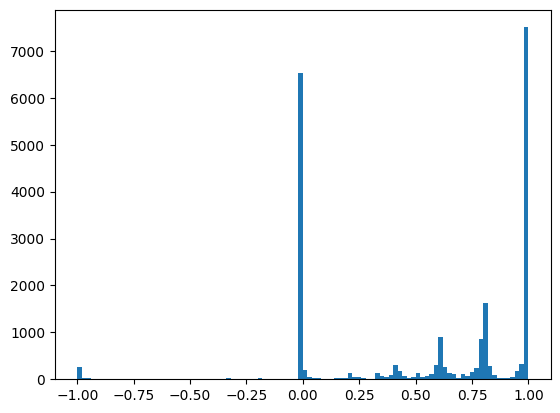

In [ ]:
# see the distribution of description_sentiment_score, in a plot
import matplotlib.pyplot as plt
plt.hist(df['top5_reviews_sentiment_score'], bins=100)
plt.show()

### Deal with ratios and compute additional metrics


In [49]:
# Compute the bedrooms per bathroom ratio
df['bedrooms_per_bathroom'] = df.apply(
    lambda row: row['bedrooms'] / row['bathrooms'] if row['bathrooms'] > 0 else None, axis=1
)

# Compute the beds per room ratio
df['beds_per_room'] = df.apply(
    lambda row: row['beds'] / row['accommodates'] if row['accommodates'] > 0 else None, axis=1
)

In [50]:
# see the value counts of the bedrooms per bathroom ratio
df['bedrooms_per_bathroom'].value_counts()

,count
bedrooms_per_bathroom,
1.000000,13149
2.000000,3070
0.000000,2054
0.500000,1015
0.666667,640
3.000000,589
1.500000,484
1.333333,223
4.000000,114


[4 3 0 2 1 5]


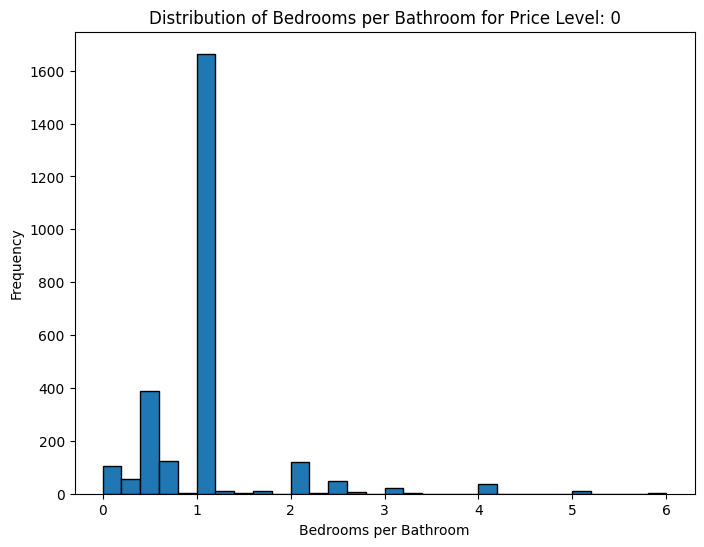

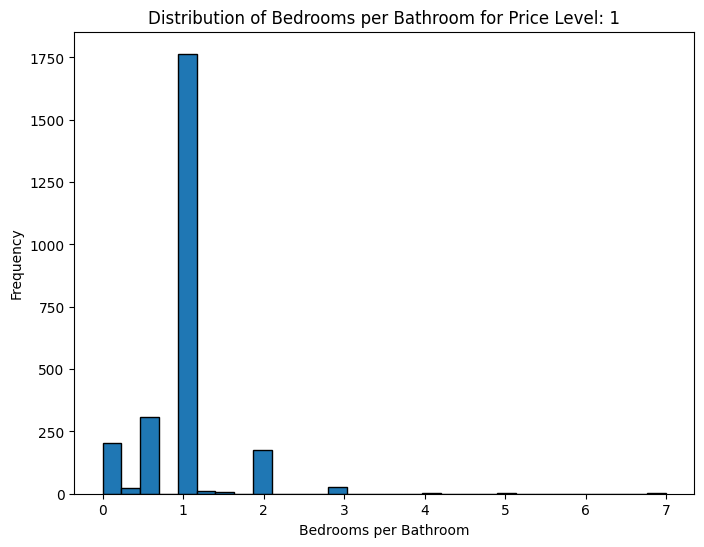

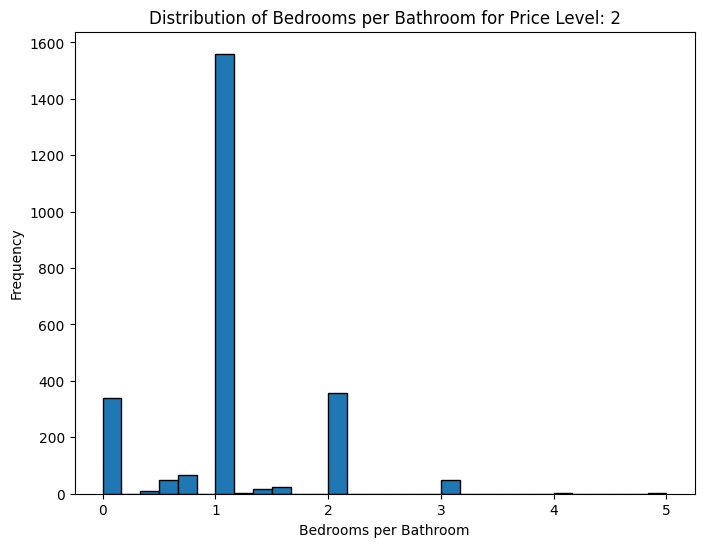

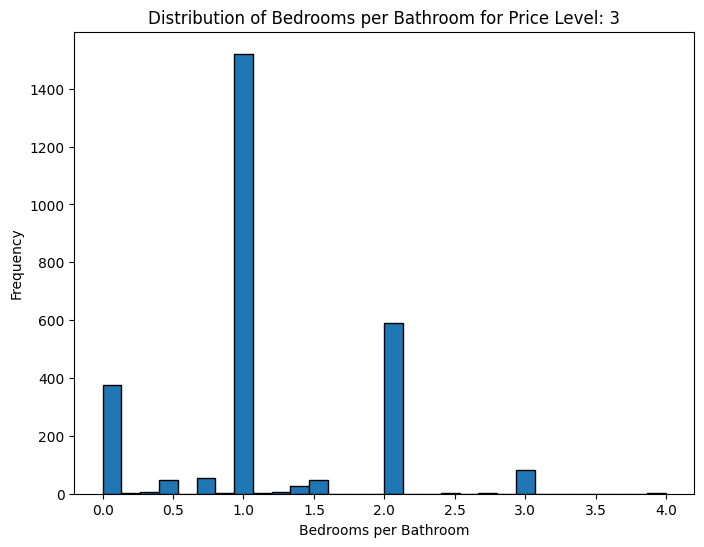

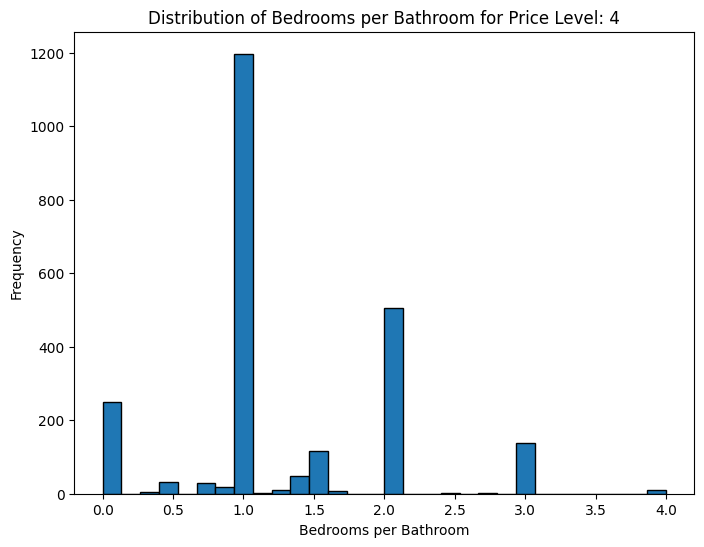

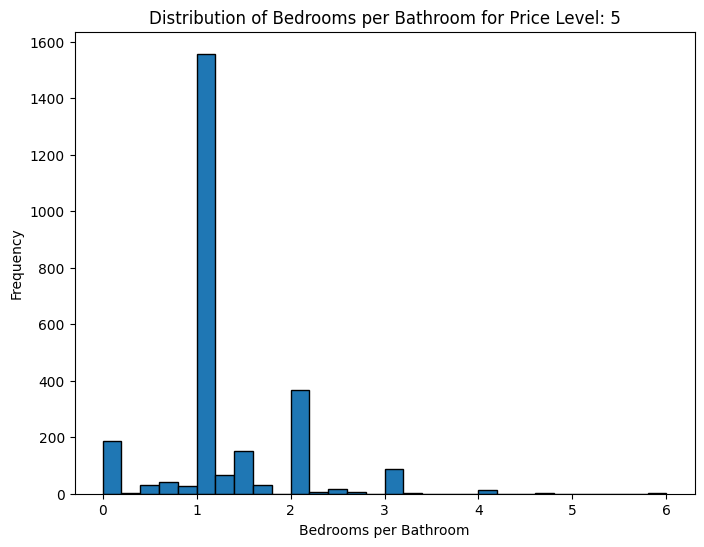

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Exclude price = -1
df_filtered = df[df['price'] != -1]

# Get unique price levels (excluding -1)
price_levels = df_filtered['price'].unique()
print(price_levels)
# Sort price levels for orderly plotting
price_levels.sort()

# Iterate over each price level and plot the distribution
for price in price_levels:
    subset = df_filtered[df_filtered['price'] == price]
    plt.figure(figsize=(8, 6))
    plt.hist(subset['bedrooms_per_bathroom'], bins=30, edgecolor='k')
    plt.title(f'Distribution of Bedrooms per Bathroom for Price Level: {price}')
    plt.xlabel('Bedrooms per Bathroom')
    plt.ylabel('Frequency')
    plt.show()

[4 3 0 2 1 5]


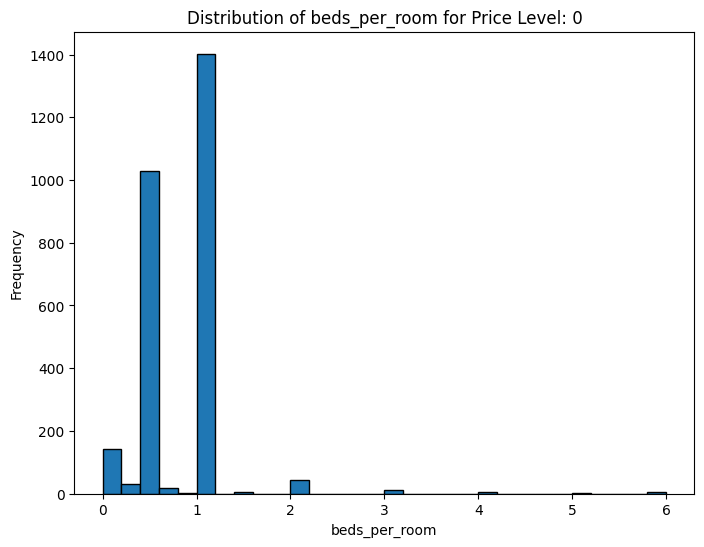

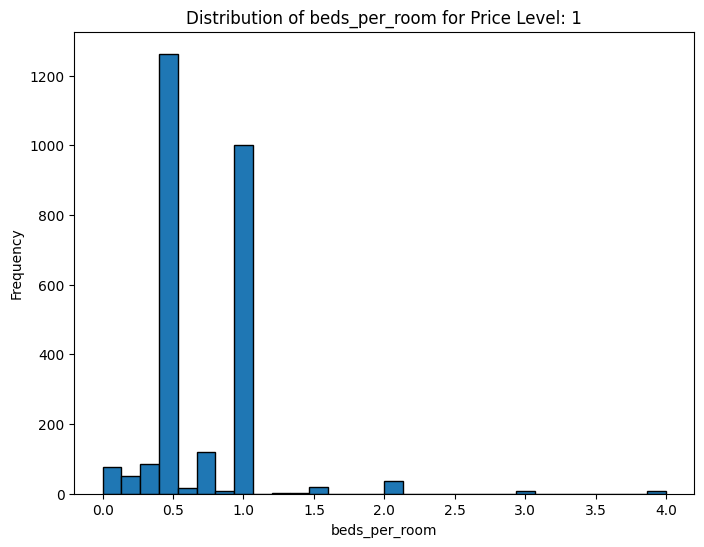

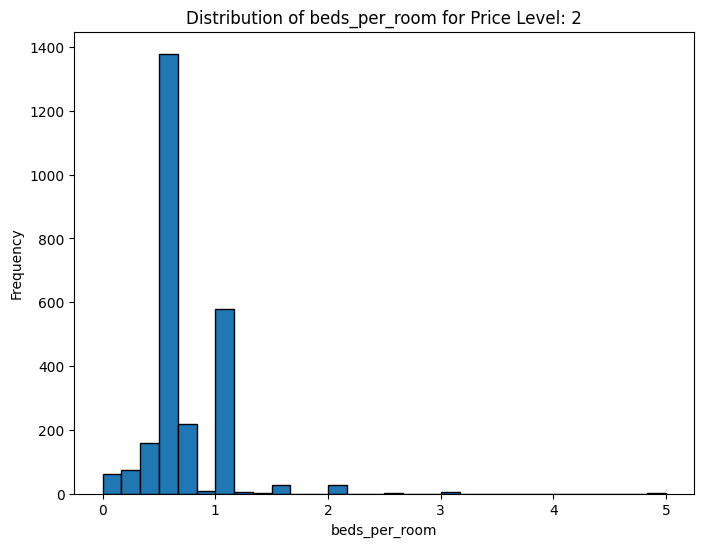

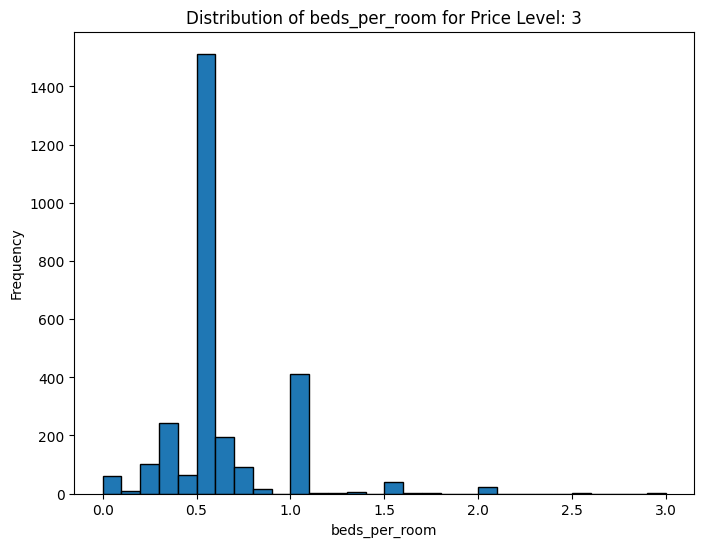

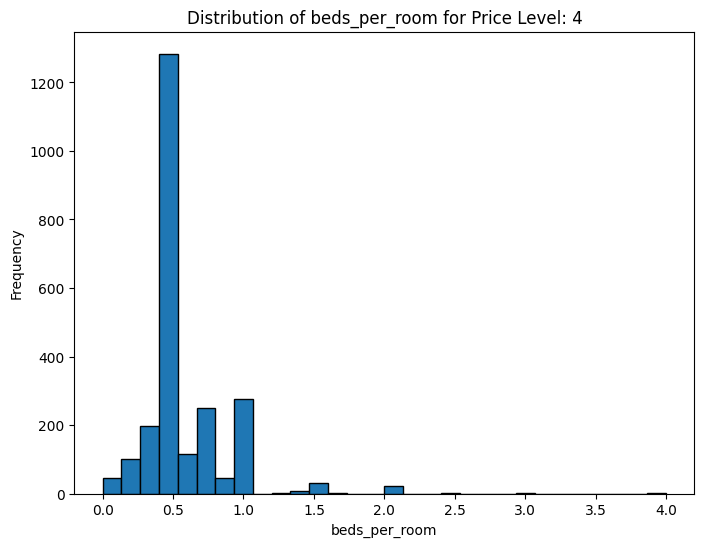

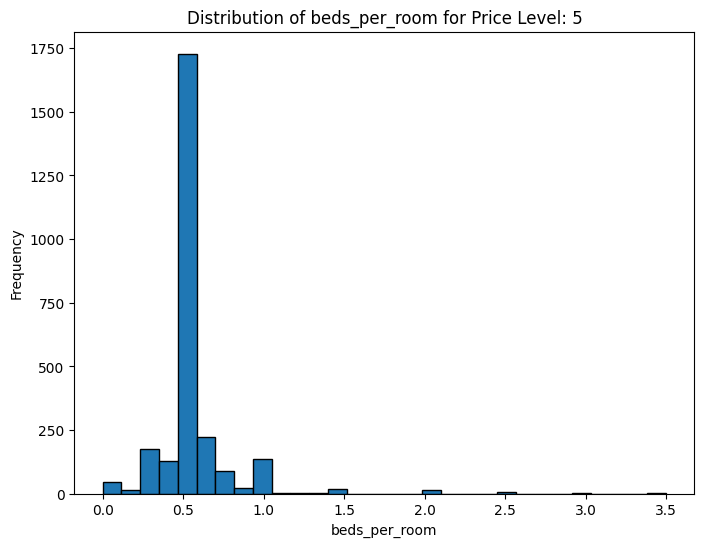

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Exclude price = -1
df_filtered = df[df['price'] != -1]

# Get unique price levels (excluding -1)
price_levels = df_filtered['price'].unique()
print(price_levels)
# Sort price levels for orderly plotting
price_levels.sort()

# Iterate over each price level and plot the distribution
for price in price_levels:
    subset = df_filtered[df_filtered['price'] == price]
    plt.figure(figsize=(8, 6))
    plt.hist(subset['beds_per_room'], bins=30, edgecolor='k')
    plt.title(f'Distribution of beds_per_room for Price Level: {price}')
    plt.xlabel('beds_per_room')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
df['beds_per_room'].value_counts()

,count
beds_per_room,
0.500000,11427
1.000000,5485
0.333333,1042
0.666667,928
0.000000,593
...,...
0.272727,1
0.357143,1
0.538462,1


the distribution is different across price levels, so include as features

In [ ]:
# see value count of this: neighbourhood_group_cleansed
df['neighbourhood_group_cleansed'].value_counts()

,count
neighbourhood_group_cleansed,
Manhattan,9681
Brooklyn,7934
Queens,3617
Bronx,876
Staten Island,315


In [53]:
# count amenities, use the length of amenities as a feature
def count_amenities(amenities_str):
    if isinstance(amenities_str, str):
        # Recover the original list of amenities and count its length
        amenities_list = amenities_str.replace('[', '').replace(']', '').replace('"', '').split(', ')
        return len(amenities_list)
    return 0  # Handle missing or invalid entries

df['num_amenities'] = df['amenities'].apply(count_amenities)
df['num_amenities'].value_counts()

,count
num_amenities,
32,716
33,646
34,557
30,552
31,551
...,...
105,1
96,1
92,1


[4 3 0 2 1 5]


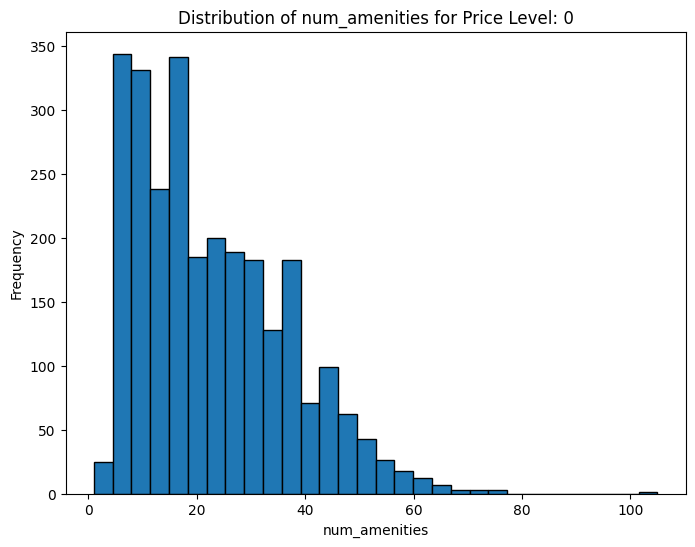

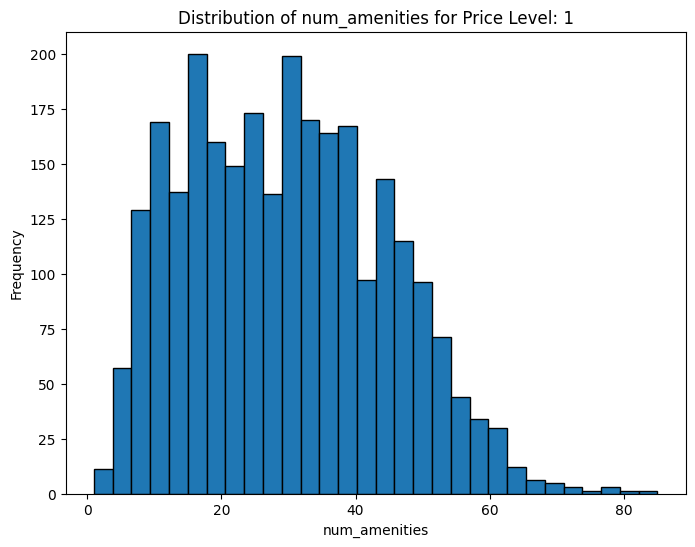

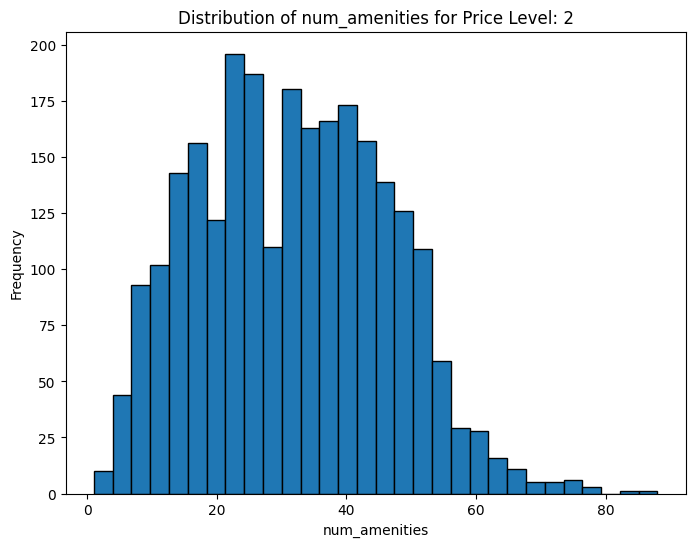

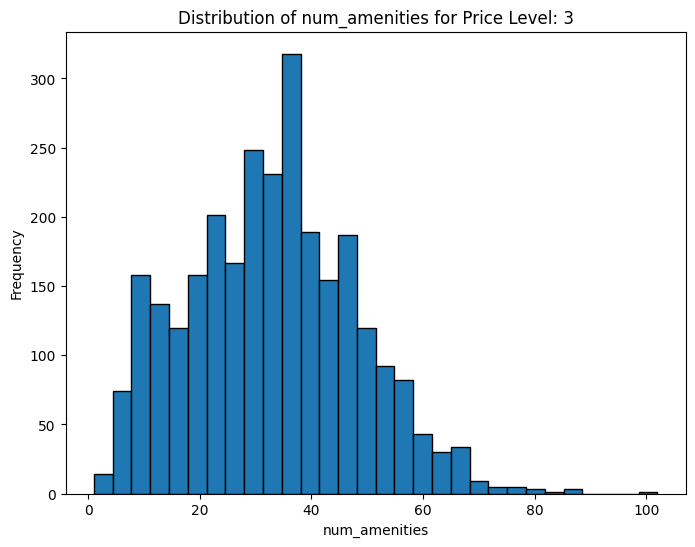

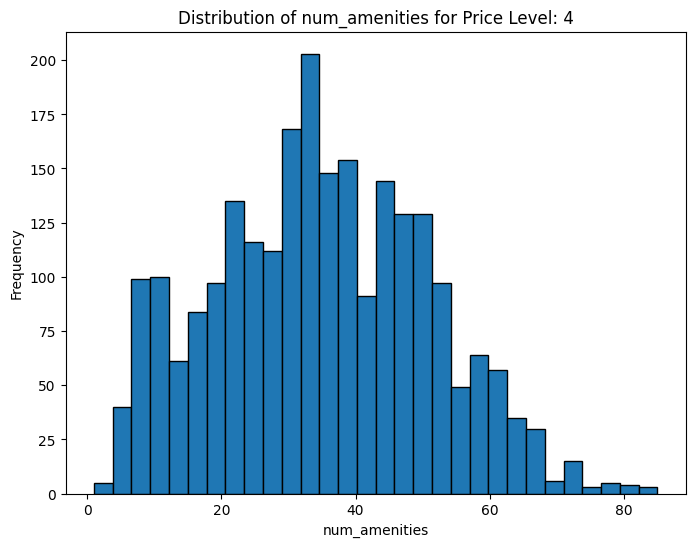

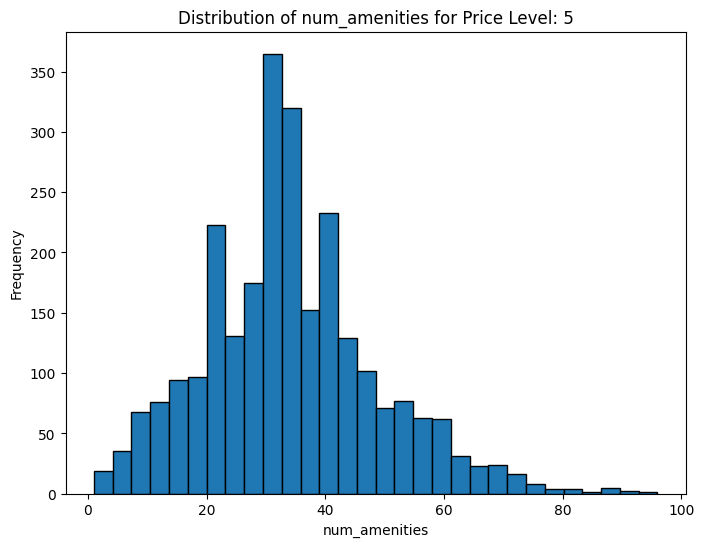

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Exclude price = -1
df_filtered = df[df['price'] != -1]

# Get unique price levels (excluding -1)
price_levels = df_filtered['price'].unique()
print(price_levels)
# Sort price levels for orderly plotting
price_levels.sort()

# Iterate over each price level and plot the distribution
for price in price_levels:
    subset = df_filtered[df_filtered['price'] == price]
    plt.figure(figsize=(8, 6))
    plt.hist(subset['num_amenities'], bins=30, edgecolor='k')
    plt.title(f'Distribution of num_amenities for Price Level: {price}')
    plt.xlabel('num_amenities')
    plt.ylabel('Frequency')
    plt.show()

shape and scale of distribution seems to be different, so include length of amenities as a feature

### One hot encodings for Categoricals

In [ ]:
# see value count of property_type
df['property_type'].value_counts()

,count
property_type,
Entire rental unit,9354
Private room in rental unit,5619
Private room in home,1889
Entire home,985
Private room in townhouse,693
Entire condo,670
Room in hotel,631
Private room in condo,332
Entire townhouse,297


[4 3 0 2 1 5]


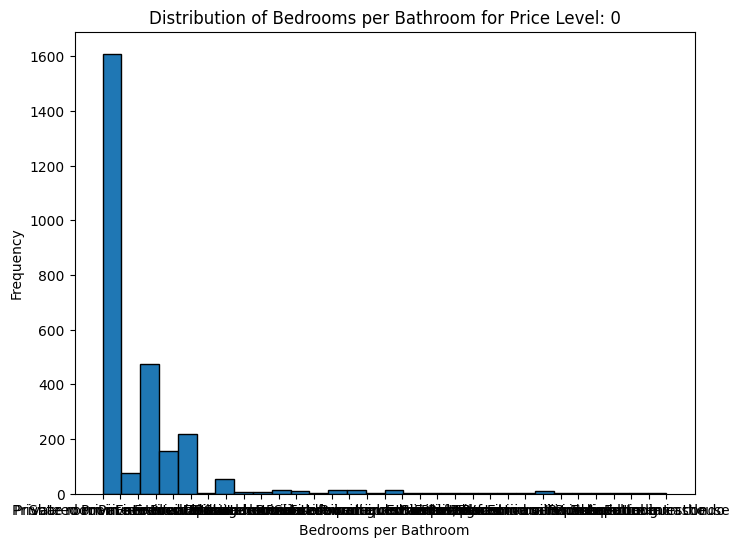

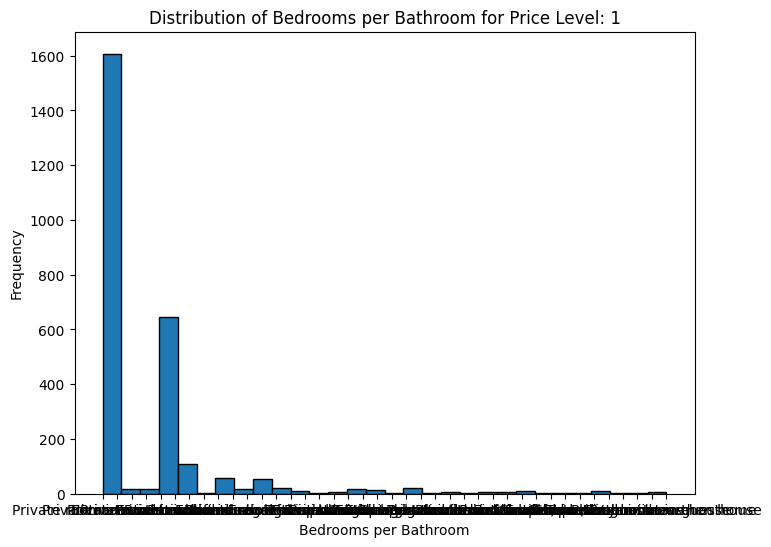

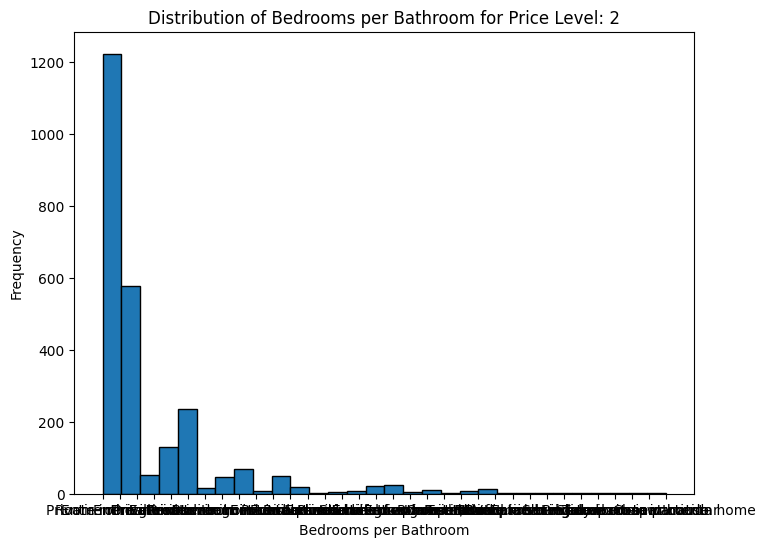

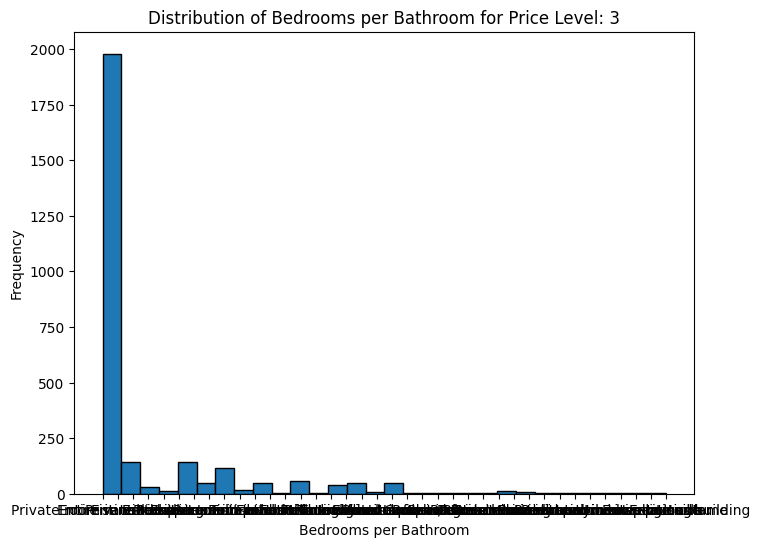

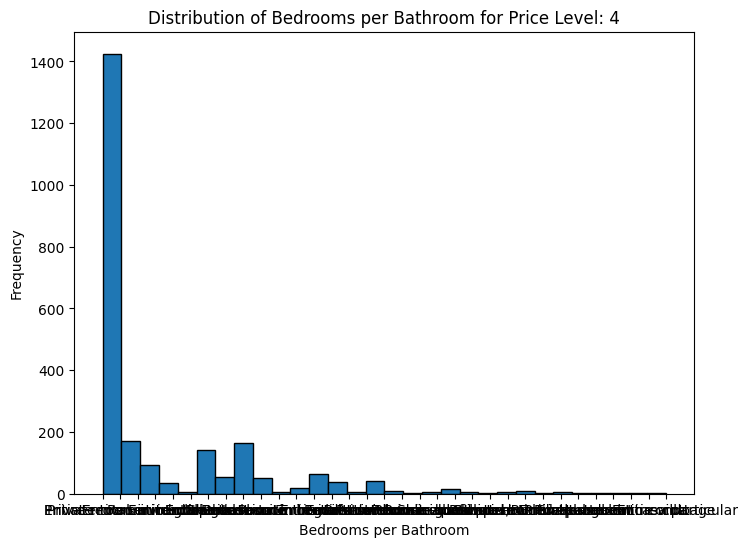

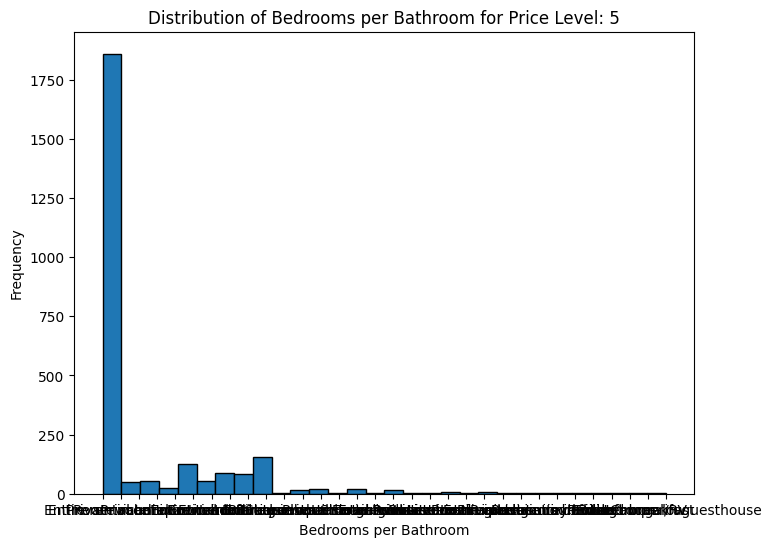

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Exclude price = -1
df_filtered = df[df['price'] != -1]

# Get unique price levels (excluding -1)
price_levels = df_filtered['price'].unique()
print(price_levels)
# Sort price levels for orderly plotting
price_levels.sort()

# Iterate over each price level and plot the distribution
for price in price_levels:
    subset = df_filtered[df_filtered['price'] == price]
    plt.figure(figsize=(8, 6))
    plt.hist(subset['property_type'], bins=30, edgecolor='k')
    plt.title(f'Distribution of Property type for Price Level: {price}')
    plt.xlabel('property type')
    plt.ylabel('Frequency')
    plt.show()

this shows that for lower price level the property type differs a bit in distribution, so include this as a predictor variable

In [ ]:
# One-hot encoding property_type
df = pd.get_dummies(df, columns=['property_type'], prefix='property', drop_first=False)

In [ ]:
# room_type
df['room_type'].value_counts()

,count
room_type,
Entire home/apt,12242
Private room,9651
Hotel room,291
Shared room,239


[4 3 0 2 1 5]


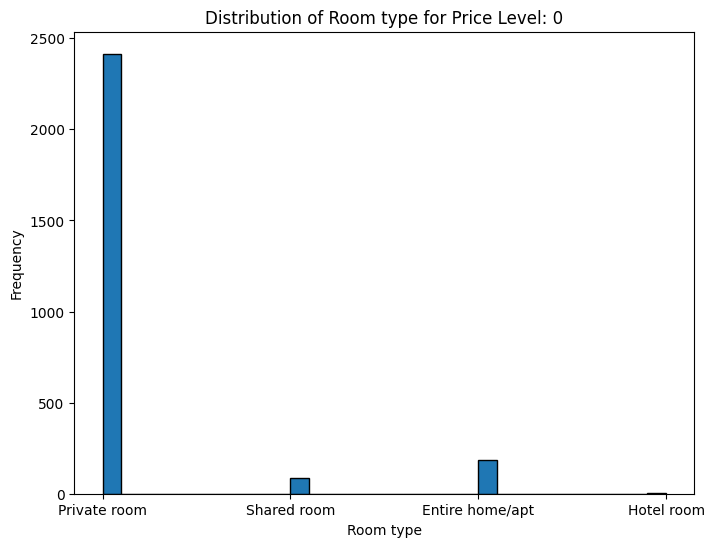

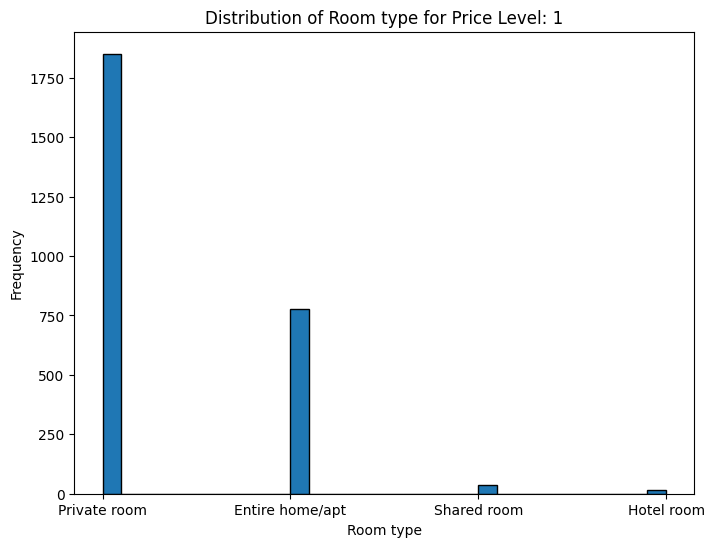

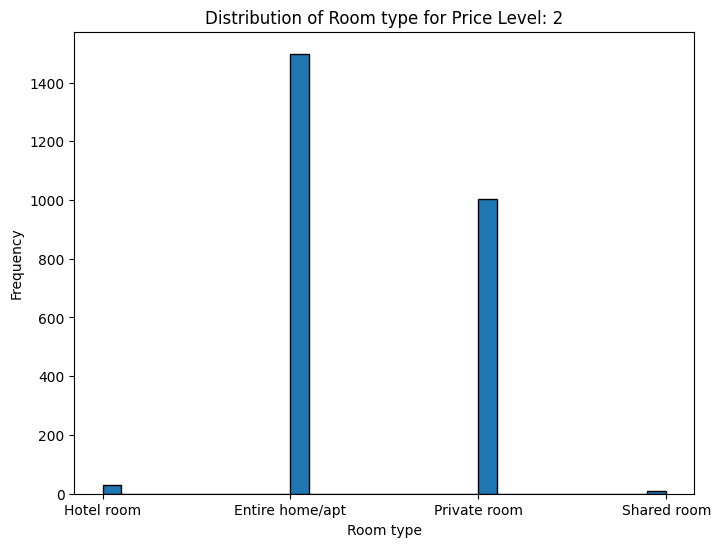

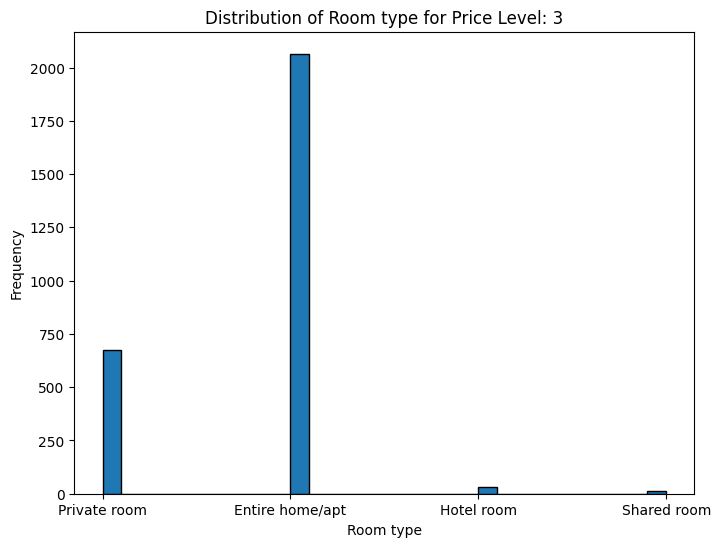

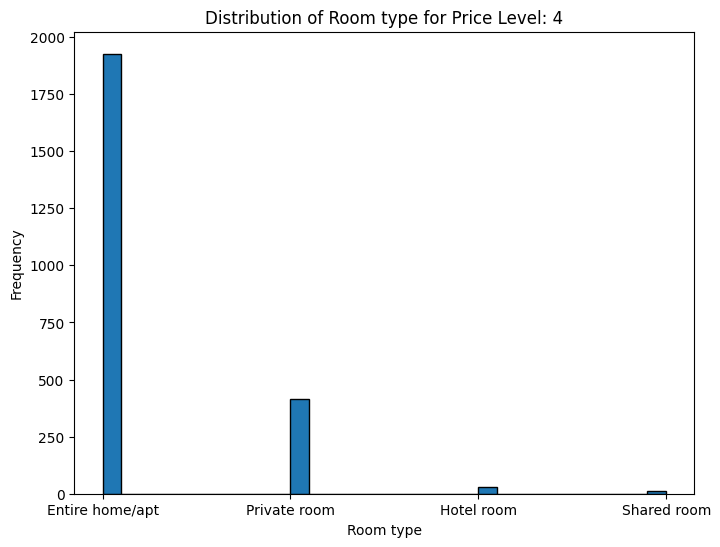

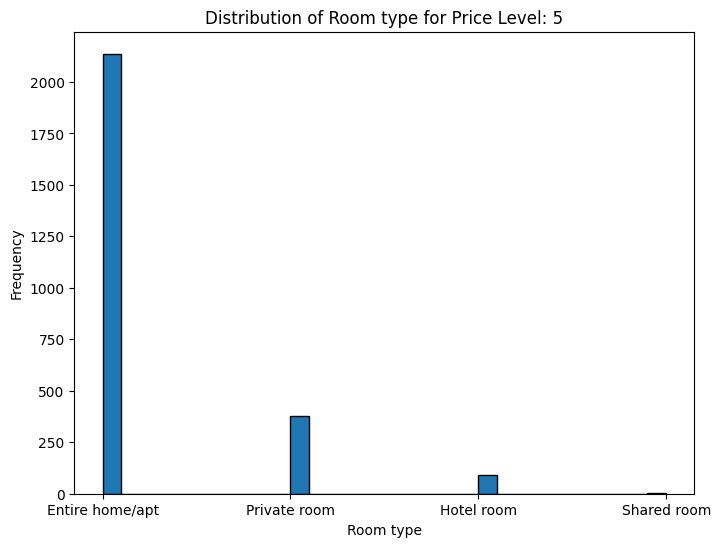

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Exclude price = -1
df_filtered = df[df['price'] != -1]

# Get unique price levels (excluding -1)
price_levels = df_filtered['price'].unique()
print(price_levels)
# Sort price levels for orderly plotting
price_levels.sort()

# Iterate over each price level and plot the distribution
for price in price_levels:
    subset = df_filtered[df_filtered['price'] == price]
    plt.figure(figsize=(8, 6))
    plt.hist(subset['room_type'], bins=30, edgecolor='k')
    plt.title(f'Distribution of Room type for Price Level: {price}')
    plt.xlabel('Room type')
    plt.ylabel('Frequency')
    plt.show()

room type distribution seems to be very different, which contributes to enthropy reduction, so definitely include this dummy feature

In [ ]:
# One-hot encode 'room_type' and 'property_type'
df = pd.get_dummies(df, columns=['room_type'], prefix=['room'], drop_first=False)

In [ ]:
# Convert to binary indicators (0/1)
df['host_is_superhost'] = df['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)
df['host_has_profile_pic'] = df['host_has_profile_pic'].apply(lambda x: 1 if x == 't' else 0)
df['host_identity_verified'] = df['host_identity_verified'].apply(lambda x: 1 if x == 't' else 0)

In [ ]:
df['host_is_superhost'].value_counts()

,count
host_is_superhost,
0,22423


In [ ]:
#df = pd.get_dummies(df, columns=['host_is_superhost'], prefix='superhost', drop_first=False)

In [ ]:
df['host_response_time'].value_counts()

,count
host_response_time,
within an hour,11978
others,6289
within a few hours,4156


[4 3 0 2 1 5]


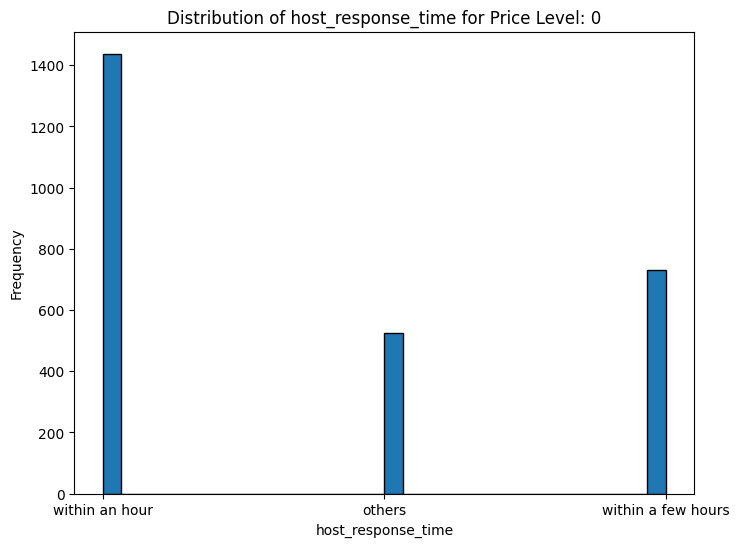

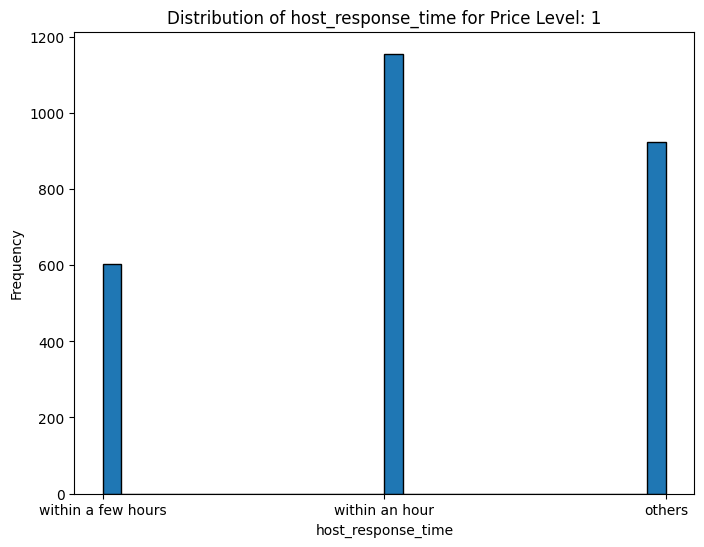

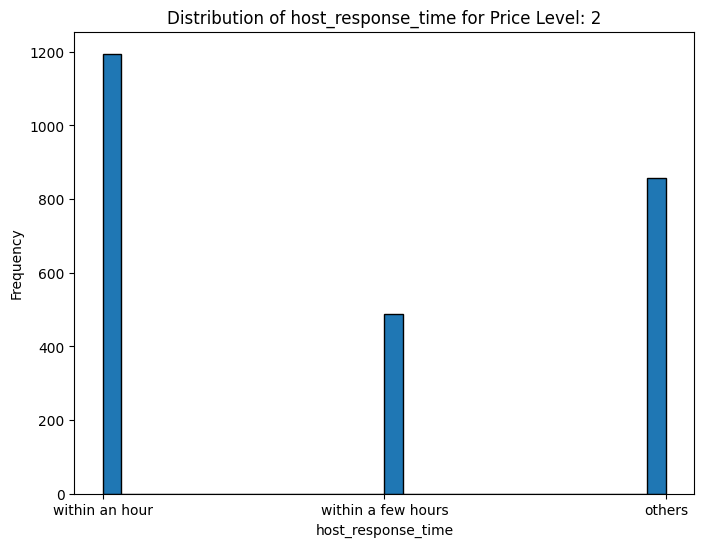

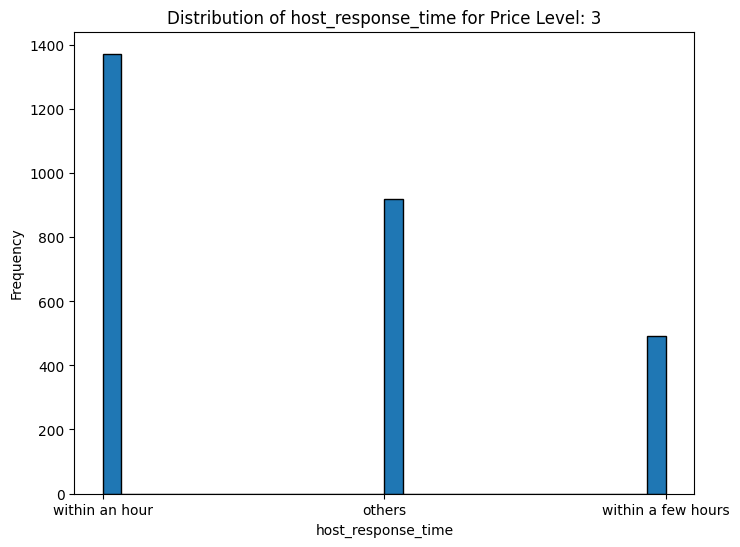

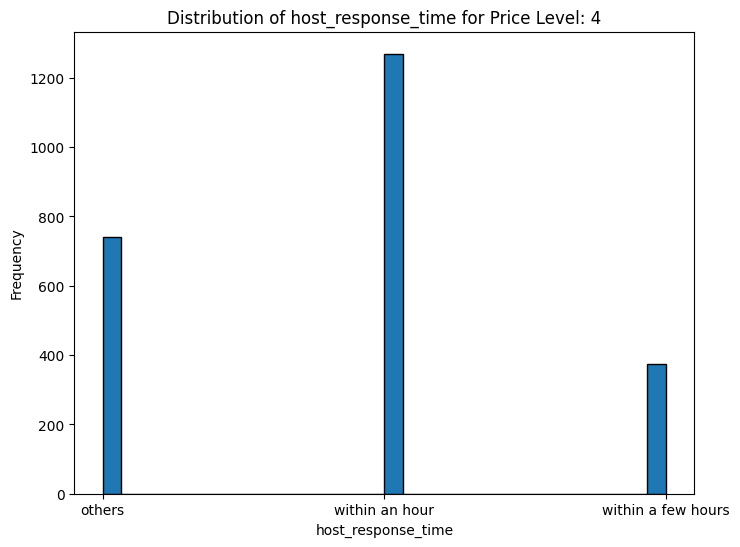

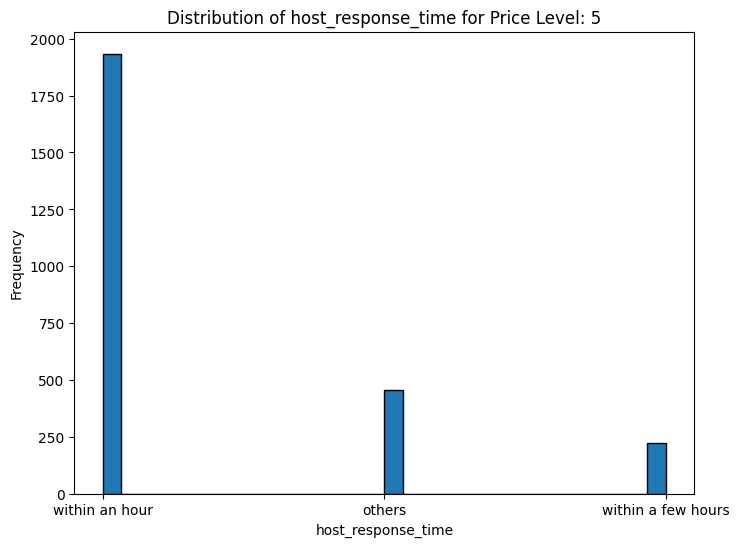

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Exclude price = -1
df_filtered = df[df['price'] != -1]

# Get unique price levels (excluding -1)
price_levels = df_filtered['price'].unique()
print(price_levels)
# Sort price levels for orderly plotting
price_levels.sort()

# Iterate over each price level and plot the distribution
for price in price_levels:
    subset = df_filtered[df_filtered['price'] == price]
    plt.figure(figsize=(8, 6))
    plt.hist(subset['host_response_time'], bins=30, edgecolor='k')
    plt.title(f'Distribution of host_response_time for Price Level: {price}')
    plt.xlabel('host_response_time')
    plt.ylabel('Frequency')
    plt.show()

distribution varying across each price level, so include as a feature

In [ ]:
df = pd.get_dummies(df, columns=['host_response_time'], prefix='host_res_t', drop_first=False)

In [ ]:
# One-hot encode 'has_availability'
df['has_availability'] = df['has_availability'].apply(lambda x: 1 if x == 't' else 0)

# 'instant_bookable' is already a boolean column; ensure it's binary (0/1)
df['instant_bookable'] = df['instant_bookable'].astype(int)

In [ ]:
# value count of has_availability, this is useless so is later dropped
df['has_availability'].value_counts()

,count
has_availability,
0,22423


In [ ]:
# value count of instant bookable
df['instant_bookable'].value_counts()

,count
instant_bookable,
0,17086
1,5337


[4 3 0 2 1 5]


<ipython-input-62-759f4b5125ae>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['instant_bookable'] = df_filtered['instant_bookable'].astype(int)


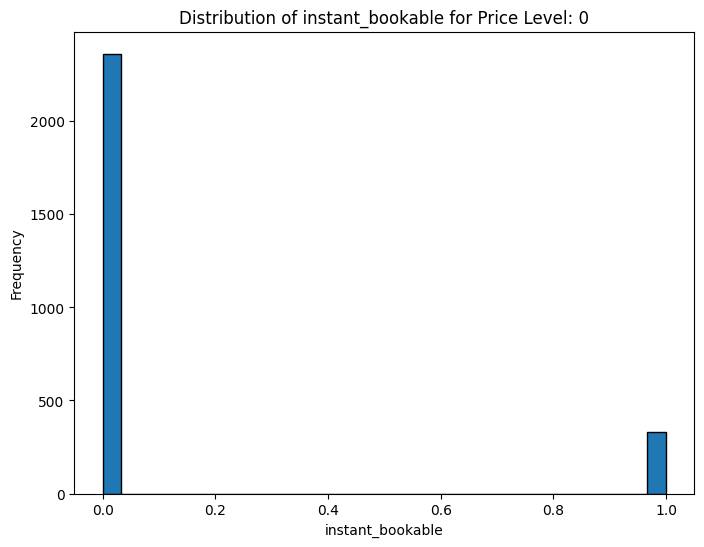

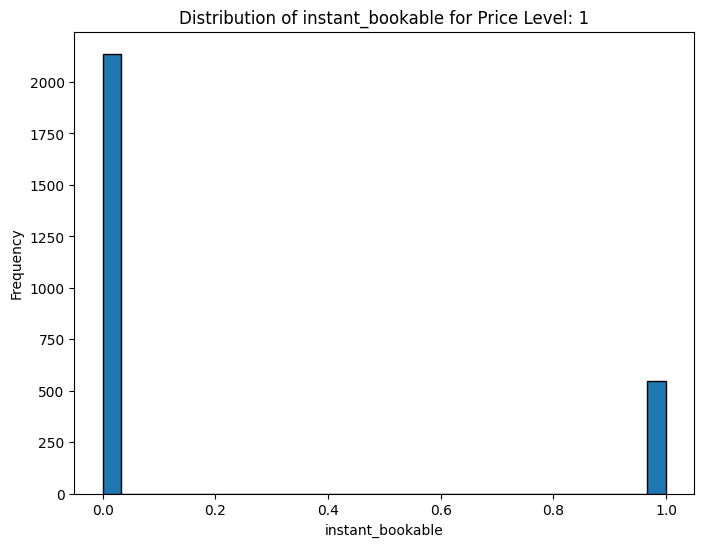

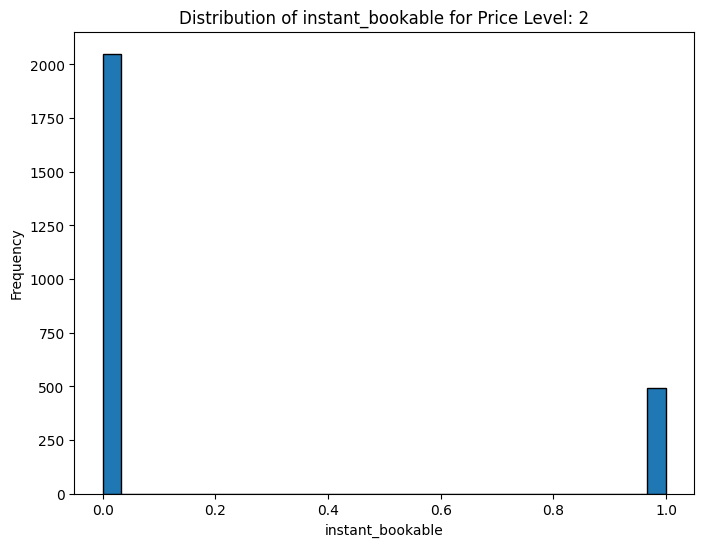

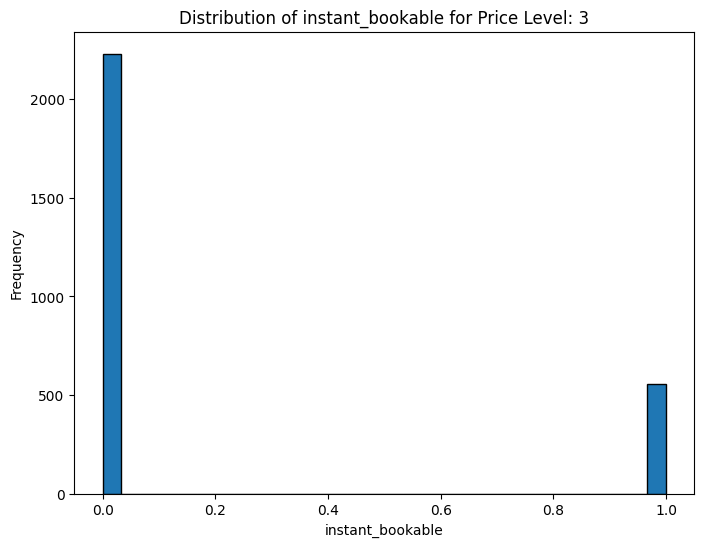

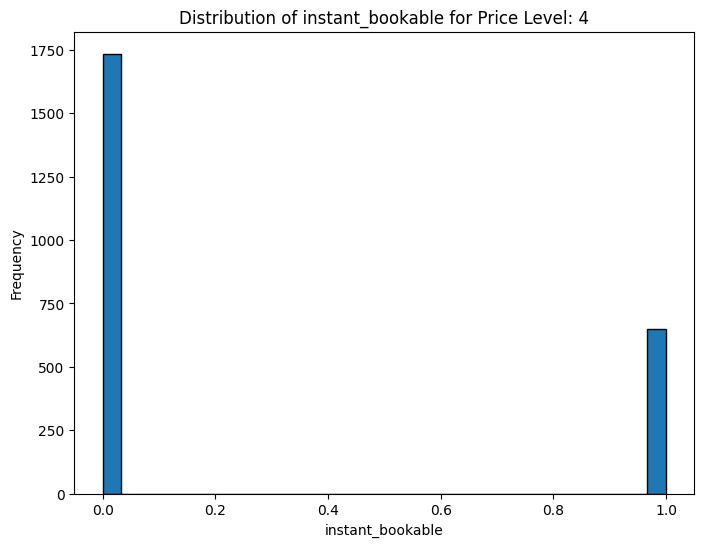

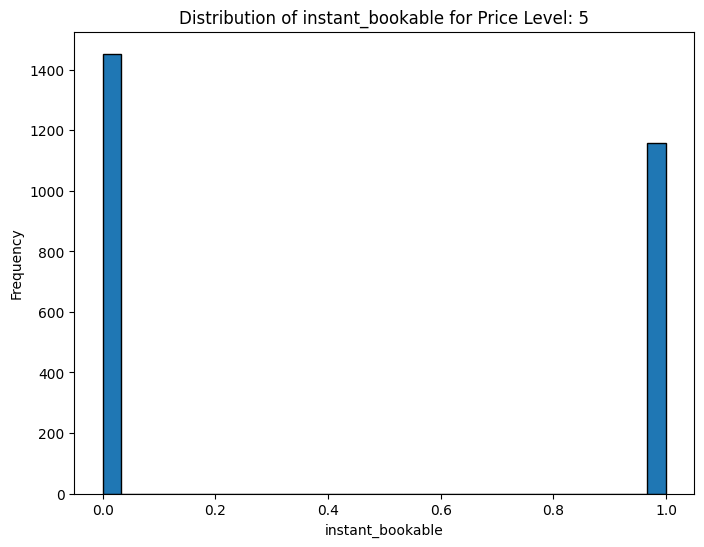

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Exclude price = -1
df_filtered = df[df['price'] != -1]

# Get unique price levels (excluding -1)
price_levels = df_filtered['price'].unique()
print(price_levels)
# Sort price levels for orderly plotting
price_levels.sort()

# convert instant_bookable to int
df_filtered['instant_bookable'] = df_filtered['instant_bookable'].astype(int)

# Iterate over each price level and plot the distribution
for price in price_levels:
    subset = df_filtered[df_filtered['price'] == price]
    plt.figure(figsize=(8, 6))
    plt.hist(subset['instant_bookable'], bins=30, edgecolor='k')
    plt.title(f'Distribution of instant_bookable for Price Level: {price}')
    plt.xlabel('instant_bookable')
    plt.ylabel('Frequency')
    plt.show()

instant bookable rate increased as price level increase, so include as a feature

### save dataframe temp

In [ ]:
import pickle
import os
from google.colab import drive
drive.mount('/content/drive')

# Specify the filename where you want to save the DataFrame
filename = '/content/drive/My Drive/Colab Notebooks/df_kaggle.pkl'  # Adjust the path as needed

# Assuming df_test1 is the DataFrame you want to save
with open(filename, 'wb') as file:  # 'wb' means write in binary mode
    pickle.dump(df, file)

print(f"'df' has been saved to {filename}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'df' has been saved to /content/drive/My Drive/Colab Notebooks/df_kaggle.pkl


### Price Expensiveness


!!this is done separately for train, dev, and map through a dictionary to test data, so no info leakage (as we are not knowing anything about test data before the actual model prediction)

[4 3 0 2 1 5]


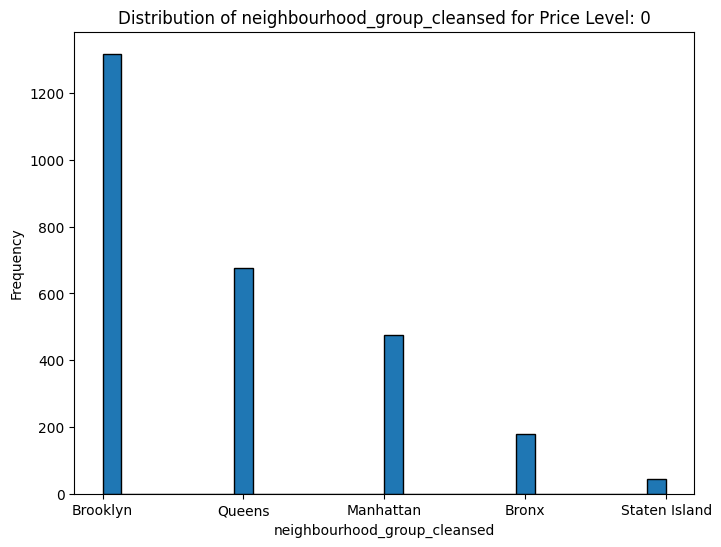

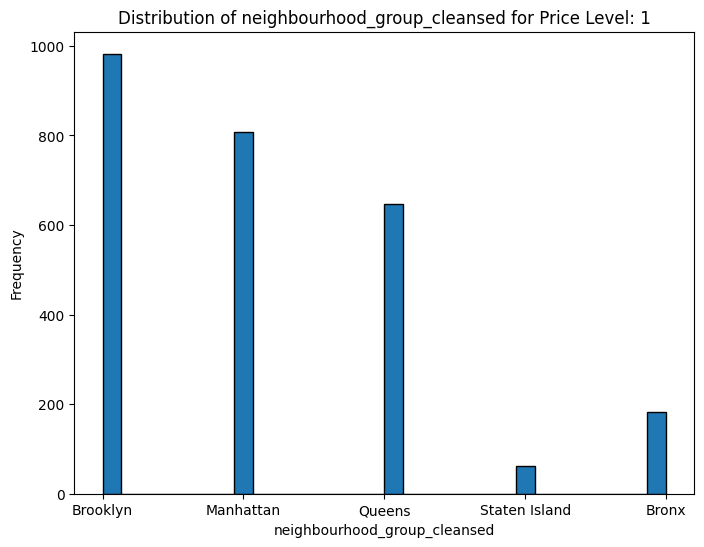

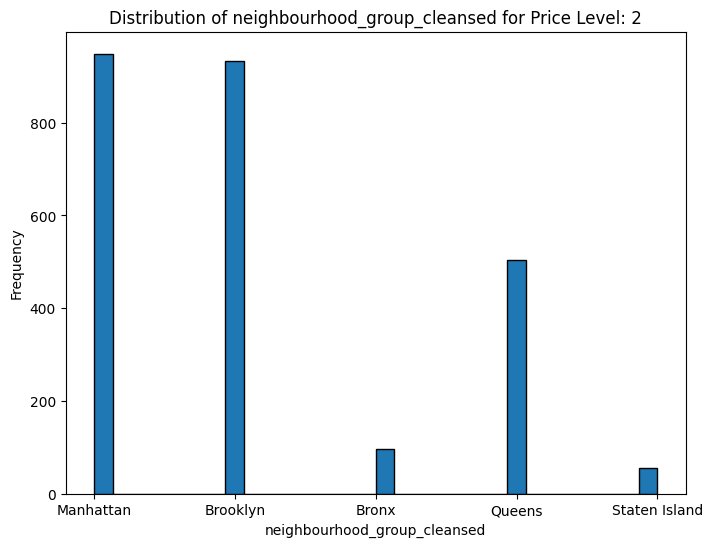

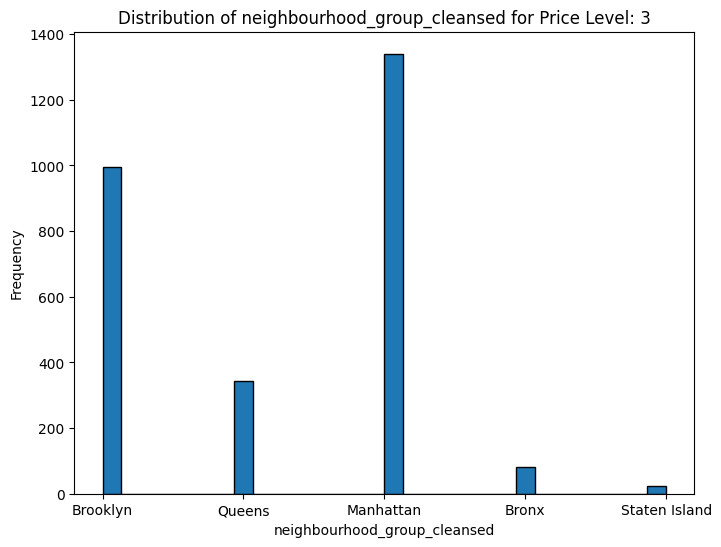

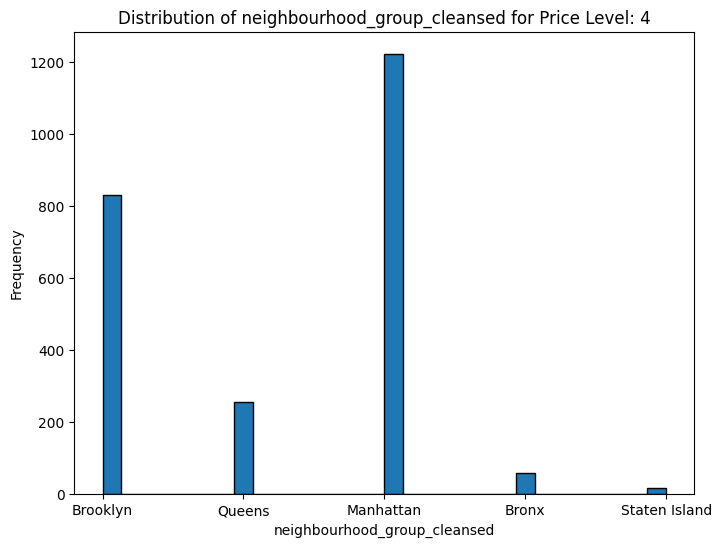

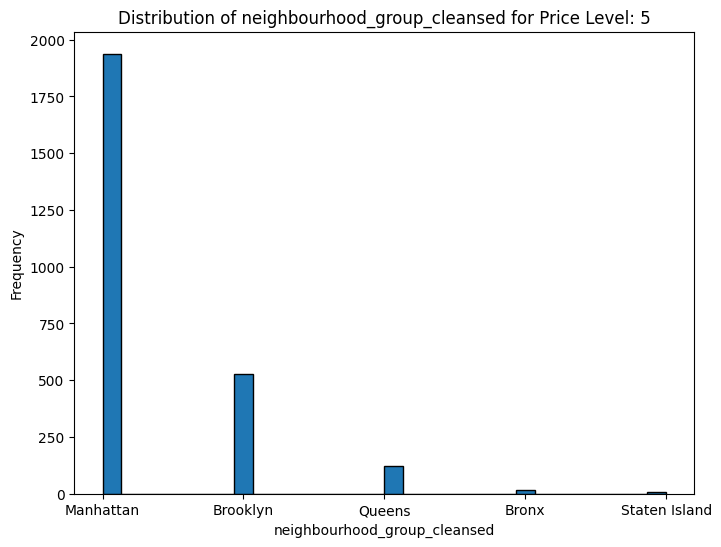

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Exclude price = -1
df_filtered = df[df['price'] != -1]

# Get unique price levels (excluding -1)
price_levels = df_filtered['price'].unique()
print(price_levels)
# Sort price levels for orderly plotting
price_levels.sort()

# Iterate over each price level and plot the distribution
for price in price_levels:
    subset = df_filtered[df_filtered['price'] == price]
    plt.figure(figsize=(8, 6))
    plt.hist(subset['neighbourhood_group_cleansed'], bins=30, edgecolor='k')
    plt.title(f'Distribution of neighbourhood_group_cleansed for Price Level: {price}')
    plt.xlabel('neighbourhood_group_cleansed')
    plt.ylabel('Frequency')
    plt.show()

price of manhattan seems to be noticeably higher. so definitely encode the grouped neighbourhood as features. the subneighbourhood's price expensiveness can be computed as a feature. This sounds like a bit cheating since price is sth that we aim to predict. But in the real testing set, we wont have information about the price expensiveness, so there is no leakage in testing data. We are still only using the information we acquired from the training set to predict, which should be an acceptable practice.

In [ ]:
# Separate training and testing datasets based on the 'id' column
data_train_processed = df[df['id'] == -1].drop(columns=['id']).reset_index(drop=True)
data_test_processed = df[df['id'] != -1].reset_index(drop=True)  # Keep 'id' column for testing

In [ ]:
data_train_processed.head()

,name,description,price,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,host_since,host_response_rate,host_acceptance_rate,...,property_Shared room in vacation home,property_Tiny home,room_Entire home/apt,room_Hotel room,room_Private room,room_Shared room,superhost_0,host_res_t_others,host_res_t_within a few hours,host_res_t_within an hour
0,Bed-Stuy 2 Bed/2 Bath - Renovated,"Welcome to Bed-Stuy, Brooklyn! Our newly renovated brownstone has an apartment that is colorful and comfortable and entirely yours during your stay. Bed-Stuy is a friendly neighborhood with tree-lined streets and rows upon rows of traditional brownstones. We are close to many restaurants and coffee shops as well as perfectly located for exploring Brooklyn. Relax on the patio or take a quick trip into that other borough (Manhattan). We are a 5 minute walk to the Kingston/Throop C subway.",4,Bedford-Stuyvesant,Brooklyn,40.684560,-73.939870,2015-05-23 00:00:00,100.0,100.0,...,False,False,True,False,False,False,True,True,False,False
1,Victorian Flatbush Oasis,"Lovely nonsmoking annex in Brooklyn's ""secret suburb"": Ditmas Park. Shared part of a one-unit house (Owner present in same unit); has external entrance from shared porch. A bdrm door provides access to rest of the house. Near shops, services, transit: Cortelyou, Newkirk. Easy access Manh or Coney. Sunday farm market. Near Prospect Park and Green-Wood Cemetery (Basquiat, Leonard Bernstein). Wonderful food, art, music, shops. Tip: when warm fly early/late to avoid t-storms. JFK best.",3,Flatbush,Brooklyn,40.638991,-73.965739,2023-09-14 00:00:00,100.0,98.0,...,False,False,False,False,True,False,True,False,False,True
2,Bay Ridge Metroscape: Inviting NYC Studio Living,"This studio presents unparalleled convenience and comfort just moments away from subway access, local restaurants, and shopping destinations. It's an ideal choice for individuals or couples seeking a harmonious balance of privacy and the opportunity to immerse themselves in a lively community atmosphere.",3,Fort Hamilton,Brooklyn,40.618810,-74.032380,2022-07-31 00:00:00,100.0,100.0,...,False,False,True,False,False,False,True,False,False,True
3,"New HDTV room, 20 minutes to Manhattan #724","- Furnished room in a newly renovated apartment in Crown Heights, 4 windows, 10 minute walk to Prospect Park, centrally located next to Franklin Ave.<br />- Subway: near the 2, 3, 4, 5, A, C, S trains, 20 minutes to Manhattan.<br />- Furnished room includes: closet, bed, mattress, desk, chair, nightstand, lamp, curtains and central AC. Access to rooftop, restaurants near by.<br />- Location: Park Pl and Rogers Ave, Brooklyn<br />- There is a one-time room cleaning and administration cost of $125",0,Crown Heights,Brooklyn,40.673970,-73.953990,2012-08-11 00:00:00,99.0,23.0,...,False,False,False,False,True,False,True,False,False,True
4,Just What You Were Looking For! Pets Allowed,"This modern property in Manhattan is just steps away from top NYC attractions and the perfect place to stay while you explore the Big Apple. Iconic attractions like the Empire State Building, Macy’s, the Fashion District, and Madison Square Garden are mere steps away. Penn Station, Broadway, and Times Square are also within walking distance. The property is also close to several subway stations, so you’ll have easy access to all the most popular NYC attractions on your itinerary!",2,Midtown,Manhattan,40.747180,-73.985390,2014-12-23 00:00:00,93.0,95.0,...,False,False,False,True,False,False,True,False,False,True


In [ ]:
data_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15696 entries, 0 to 15695
Columns: 159 entries, name to host_res_t_within an hour
dtypes: bool(68), datetime64[ns](2), float64(23), int64(56), object(10)
memory usage: 11.9+ MB


In [ ]:
data_test_processed.head()

,id,name,description,price,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,host_since,host_response_rate,...,property_Shared room in vacation home,property_Tiny home,room_Entire home/apt,room_Hotel room,room_Private room,room_Shared room,superhost_0,host_res_t_others,host_res_t_within a few hours,host_res_t_within an hour
0,3917,"Beautiful 3 bedroom House in Woodside, Queens","Beautiful 3 bedroom house in the heart of Woodside, Queens. Only 18 minutes train ride to Manhattan. Situated two blocks from the 7 subway train and two blocks from the LIRR (Long Island Railroad). The house sleeps 6 people and has a large living room with TV, Fire stick and high speed internet that makes it perfect for streaming, gaming and work from home. There is a nice backyard with a deck and table to enjoy the outdoor weather. Minutes away from restaurants, groceries and major shops.",-1,Woodside,Queens,40.744620,-73.904520,2013-05-07 00:00:00,100.0,...,False,False,True,False,False,False,True,True,False,False
1,1885,"Queens HDTV Room 13 mins to Manhattan, 3 bath #457","Bright bedroom in the best part of Long Island City, right on 39th Ave and 27th Street. Room has a HDTV, dresser, desk, chair, Wifi and a large closet. 3 Bathroom apartment (two of the bathrooms are private and not available for use)<br />5 min walk to N or 7 train, 13 min to Manhattan.<br />Restaurants, cafes, bars, salons are on the same block, you are in the center of the best neighborhood in Queens!<br />There is a one-time room cleaning and administration cost of $125",-1,Long Island City,Queens,40.753407,-73.934995,2012-08-11 00:00:00,99.0,...,False,False,False,False,True,False,True,False,False,True
2,1305,Lovely Bright & Spacious Loft in Brooklyn.,"Our loft is spacious and calm, filled with natural sun light and over looking garden.Hight ceiling, brick wall & well design and furnished.<br />This cozy Loft is conveniently located 5 minutes away to (A&C) Subway lines .Walking distance to all the shops, cafes & restaurants. A peaceful 20 minutes walk through Eastern Park Promenade to Brooklyn Museum, Botanical Garden and the gorgeous Prospect Park. A short distance to Manhattan. ( 20 Minutes to Times Square.)",-1,Crown Heights,Brooklyn,40.677090,-73.943810,2012-05-14 00:00:00,100.0,...,False,False,True,False,False,False,True,True,False,False
3,19328,Classic Petite Room SB #17 - Furnished Studio,"Extended stay hotel , all rooms are fully furnished. Communal kitchen and 3 shared bathrooms on each floor. Cable ready Tv, wifi, electricity all included in the rent. Perfect for student housing, temporary relocation. Reception open 24 hours. Elevator and Laundry in the building. 3 Blocks away from train station 1,2,3 red line. 10 min from Times Square, Central Park and Columbia University.",-1,Upper West Side,Manhattan,40.795760,-73.971570,2021-04-05 00:00:00,70.0,...,False,False,True,False,False,False,True,True,False,False
4,16511,Petit chalet with secret garden,"Small loft type of apartment on ground floor with private garden in the heart of Williamsburg cool scene. Close to subway, cafe, bars, restaurant and movie theater, yet when you are inside it's so quiet and cozy. Urban sanctuary.",-1,Williamsburg,Brooklyn,40.713590,-73.955400,2014-10-07 00:00:00,100.0,...,False,False,True,False,False,False,True,False,True,False


In [ ]:
# Group by 'neighbourhood_cleansed' and compute the expensiveness
# Group by 'neighbourhood_cleansed' and compute the average price
data_train_processed['neighbourhood_expensiveness'] = data_train_processed.groupby('neighbourhood_cleansed')['price'].transform('mean')
data_train_processed['neighbourhood_expensiveness'].value_counts()

,count
neighbourhood_expensiveness,
1.834951,1236
4.008999,889
1.941096,730
3.126074,698
2.829513,698
...,...
1.250000,4
0.750000,4
3.333333,3


In [ ]:
data_train_processed.head()

,name,description,price,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,host_since,host_response_rate,host_acceptance_rate,...,property_Tiny home,room_Entire home/apt,room_Hotel room,room_Private room,room_Shared room,superhost_0,host_res_t_others,host_res_t_within a few hours,host_res_t_within an hour,neighbourhood_expensiveness
0,Bed-Stuy 2 Bed/2 Bath - Renovated,"Welcome to Bed-Stuy, Brooklyn! Our newly renovated brownstone has an apartment that is colorful and comfortable and entirely yours during your stay. Bed-Stuy is a friendly neighborhood with tree-lined streets and rows upon rows of traditional brownstones. We are close to many restaurants and coffee shops as well as perfectly located for exploring Brooklyn. Relax on the patio or take a quick trip into that other borough (Manhattan). We are a 5 minute walk to the Kingston/Throop C subway.",4,Bedford-Stuyvesant,Brooklyn,40.684560,-73.939870,2015-05-23 00:00:00,100.0,100.0,...,False,True,False,False,False,True,True,False,False,1.834951
1,Victorian Flatbush Oasis,"Lovely nonsmoking annex in Brooklyn's ""secret suburb"": Ditmas Park. Shared part of a one-unit house (Owner present in same unit); has external entrance from shared porch. A bdrm door provides access to rest of the house. Near shops, services, transit: Cortelyou, Newkirk. Easy access Manh or Coney. Sunday farm market. Near Prospect Park and Green-Wood Cemetery (Basquiat, Leonard Bernstein). Wonderful food, art, music, shops. Tip: when warm fly early/late to avoid t-storms. JFK best.",3,Flatbush,Brooklyn,40.638991,-73.965739,2023-09-14 00:00:00,100.0,98.0,...,False,False,False,True,False,True,False,False,True,1.500000
2,Bay Ridge Metroscape: Inviting NYC Studio Living,"This studio presents unparalleled convenience and comfort just moments away from subway access, local restaurants, and shopping destinations. It's an ideal choice for individuals or couples seeking a harmonious balance of privacy and the opportunity to immerse themselves in a lively community atmosphere.",3,Fort Hamilton,Brooklyn,40.618810,-74.032380,2022-07-31 00:00:00,100.0,100.0,...,False,True,False,False,False,True,False,False,True,2.847222
3,"New HDTV room, 20 minutes to Manhattan #724","- Furnished room in a newly renovated apartment in Crown Heights, 4 windows, 10 minute walk to Prospect Park, centrally located next to Franklin Ave.<br />- Subway: near the 2, 3, 4, 5, A, C, S trains, 20 minutes to Manhattan.<br />- Furnished room includes: closet, bed, mattress, desk, chair, nightstand, lamp, curtains and central AC. Access to rooftop, restaurants near by.<br />- Location: Park Pl and Rogers Ave, Brooklyn<br />- There is a one-time room cleaning and administration cost of $125",0,Crown Heights,Brooklyn,40.673970,-73.953990,2012-08-11 00:00:00,99.0,23.0,...,False,False,False,True,False,True,False,False,True,2.056863
4,Just What You Were Looking For! Pets Allowed,"This modern property in Manhattan is just steps away from top NYC attractions and the perfect place to stay while you explore the Big Apple. Iconic attractions like the Empire State Building, Macy’s, the Fashion District, and Madison Square Garden are mere steps away. Penn Station, Broadway, and Times Square are also within walking distance. The property is also close to several subway stations, so you’ll have easy access to all the most popular NYC attractions on your itinerary!",2,Midtown,Manhattan,40.747180,-73.985390,2014-12-23 00:00:00,93.0,95.0,...,False,False,True,False,False,True,False,False,True,4.008999


In [ ]:
neighbourhood_expensiveness_dict = data_train_processed.groupby('neighbourhood_cleansed')['price'].mean().to_dict()

print(neighbourhood_expensiveness_dict)
print(len(neighbourhood_expensiveness_dict))

{'Allerton': 1.368421052631579, 'Arden Heights': 2.0, 'Arrochar': 2.625, 'Arverne': 2.7872340425531914, 'Astoria': 1.6785714285714286, 'Bath Beach': 2.2, 'Battery Park City': 4.3478260869565215, 'Bay Ridge': 1.5357142857142858, 'Bay Terrace': 2.5, 'Baychester': 1.625, 'Bayside': 1.4285714285714286, 'Bayswater': 1.6, 'Bedford-Stuyvesant': 1.8349514563106797, 'Belle Harbor': 3.6, 'Bellerose': 2.4166666666666665, 'Belmont': 1.4166666666666667, 'Bensonhurst': 1.8387096774193548, 'Bergen Beach': 3.6666666666666665, 'Boerum Hill': 3.8048780487804876, 'Borough Park': 0.8333333333333334, 'Breezy Point': 3.0, 'Briarwood': 1.3333333333333333, 'Brighton Beach': 1.8076923076923077, 'Bronxdale': 0.6666666666666666, 'Brooklyn Heights': 4.0, 'Brownsville': 1.7457627118644068, "Bull's Head": 2.3333333333333335, 'Bushwick': 1.4187604690117253, 'Cambria Heights': 2.129032258064516, 'Canarsie': 2.1272727272727274, 'Carroll Gardens': 3.6666666666666665, 'Castle Hill': 2.6, 'Castleton Corners': 1.5, 'Chels

In [ ]:
# map to data_test_processed
# Step 2: Map the expensiveness to data_test_processed
data_test_processed['neighbourhood_expensiveness'] = data_test_processed.set_index(
    ['neighbourhood_cleansed']
).index.map(neighbourhood_expensiveness_dict)

In [ ]:
data_test_processed.head()

,id,name,description,price,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,host_since,host_response_rate,...,property_Tiny home,room_Entire home/apt,room_Hotel room,room_Private room,room_Shared room,superhost_0,host_res_t_others,host_res_t_within a few hours,host_res_t_within an hour,neighbourhood_expensiveness
0,3917,"Beautiful 3 bedroom House in Woodside, Queens","Beautiful 3 bedroom house in the heart of Woodside, Queens. Only 18 minutes train ride to Manhattan. Situated two blocks from the 7 subway train and two blocks from the LIRR (Long Island Railroad). The house sleeps 6 people and has a large living room with TV, Fire stick and high speed internet that makes it perfect for streaming, gaming and work from home. There is a nice backyard with a deck and table to enjoy the outdoor weather. Minutes away from restaurants, groceries and major shops.",-1,Woodside,Queens,40.744620,-73.904520,2013-05-07 00:00:00,100.0,...,False,True,False,False,False,True,True,False,False,1.167883
1,1885,"Queens HDTV Room 13 mins to Manhattan, 3 bath #457","Bright bedroom in the best part of Long Island City, right on 39th Ave and 27th Street. Room has a HDTV, dresser, desk, chair, Wifi and a large closet. 3 Bathroom apartment (two of the bathrooms are private and not available for use)<br />5 min walk to N or 7 train, 13 min to Manhattan.<br />Restaurants, cafes, bars, salons are on the same block, you are in the center of the best neighborhood in Queens!<br />There is a one-time room cleaning and administration cost of $125",-1,Long Island City,Queens,40.753407,-73.934995,2012-08-11 00:00:00,99.0,...,False,False,False,True,False,True,False,False,True,2.305556
2,1305,Lovely Bright & Spacious Loft in Brooklyn.,"Our loft is spacious and calm, filled with natural sun light and over looking garden.Hight ceiling, brick wall & well design and furnished.<br />This cozy Loft is conveniently located 5 minutes away to (A&C) Subway lines .Walking distance to all the shops, cafes & restaurants. A peaceful 20 minutes walk through Eastern Park Promenade to Brooklyn Museum, Botanical Garden and the gorgeous Prospect Park. A short distance to Manhattan. ( 20 Minutes to Times Square.)",-1,Crown Heights,Brooklyn,40.677090,-73.943810,2012-05-14 00:00:00,100.0,...,False,True,False,False,False,True,True,False,False,2.056863
3,19328,Classic Petite Room SB #17 - Furnished Studio,"Extended stay hotel , all rooms are fully furnished. Communal kitchen and 3 shared bathrooms on each floor. Cable ready Tv, wifi, electricity all included in the rent. Perfect for student housing, temporary relocation. Reception open 24 hours. Elevator and Laundry in the building. 3 Blocks away from train station 1,2,3 red line. 10 min from Times Square, Central Park and Columbia University.",-1,Upper West Side,Manhattan,40.795760,-73.971570,2021-04-05 00:00:00,70.0,...,False,True,False,False,False,True,True,False,False,3.109091
4,16511,Petit chalet with secret garden,"Small loft type of apartment on ground floor with private garden in the heart of Williamsburg cool scene. Close to subway, cafe, bars, restaurant and movie theater, yet when you are inside it's so quiet and cozy. Urban sanctuary.",-1,Williamsburg,Brooklyn,40.713590,-73.955400,2014-10-07 00:00:00,100.0,...,False,True,False,False,False,True,False,True,False,2.800310


In [ ]:
# training set might not cover all test set neighbourhoods, so impute with median
# again, training set wont have any information about the testing set, so no information leakage

# Step 1: Compute the median of 'neighbourhood_expensiveness'
median_expensiveness = data_test_processed['neighbourhood_expensiveness'].median()

# Step 2: Fill missing values with the median
data_test_processed['neighbourhood_expensiveness'].fillna(median_expensiveness, inplace=True)

# Step 3: Verify that missing values are imputed
print(data_test_processed['neighbourhood_expensiveness'].isnull().sum())  # Should output 0

0


<ipython-input-163-d67312818762>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test_processed['neighbourhood_expensiveness'].fillna(median_expensiveness, inplace=True)


### save dataframe second round

In [ ]:
import pickle
import os
from google.colab import drive
drive.mount('/content/drive')

# Specify the filename where you want to save the DataFrame
filename = '/content/drive/My Drive/Colab Notebooks/df_kaggle_train.pkl'  # Adjust the path as needed

# Assuming df_test1 is the DataFrame you want to save
with open(filename, 'wb') as file:  # 'wb' means write in binary mode
    pickle.dump(data_train_processed, file)

print(f"'df' has been saved to {filename}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'df' has been saved to /content/drive/My Drive/Colab Notebooks/df_kaggle_train.pkl


In [ ]:
import pickle
import os
from google.colab import drive
drive.mount('/content/drive')

# Specify the filename where you want to save the DataFrame
filename = '/content/drive/My Drive/Colab Notebooks/df_kaggle_test.pkl'  # Adjust the path as needed

# Assuming df_test1 is the DataFrame you want to save
with open(filename, 'wb') as file:  # 'wb' means write in binary mode
    pickle.dump(data_test_processed, file)

print(f"'df' has been saved to {filename}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'df' has been saved to /content/drive/My Drive/Colab Notebooks/df_kaggle_test.pkl


### drop column

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15696 entries, 0 to 15695
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            15696 non-null  int64         
 1   name                                          15696 non-null  object        
 2   description                                   15696 non-null  object        
 3   property_type                                 15696 non-null  object        
 4   price                                         15696 non-null  int64         
 5   neighbourhood_cleansed                        15696 non-null  object        
 6   neighbourhood_group_cleansed                  15696 non-null  object        
 7   latitude                                      15696 non-null  float64       
 8   longitude                                     15696 non-null  floa

In [ ]:
# drop columns that are not targeted or not suitable for fitting
data_train_processed['Length of amenities'] = data_train_processed['amenities'].apply(
    lambda x: len(x.replace('[', '').replace(']', '').replace('"', '').split(', '))
)

columns_to_drop = ['name', 'description', 'neighbourhood_cleansed', 'bathrooms_text', 'has_availability',
                   'reviews', 'amenities', 'amenities_list', 'host_verifications', 'host_since', 'first_review', "last_review" ]
existing_columns = [col for col in columns_to_drop if col in data_train_processed.columns]

# Drop only the existing columns
if existing_columns:
    data_train_processed = data_train_processed.drop(columns=existing_columns)

data_train_processed = pd.get_dummies(data_train_processed, columns=['neighbourhood_group_cleansed'], prefix='district', drop_first=False)
# Display the updated DataFrame
data_train_processed.head()

,price,latitude,longitude,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,calculated_host_listings_count,...,host_res_t_others,host_res_t_within a few hours,host_res_t_within an hour,neighbourhood_expensiveness,Length of amenities,district_Bronx,district_Brooklyn,district_Manhattan,district_Queens,district_Staten Island
0,4,40.684560,-73.939870,100.0,100.0,2.0,2.0,0,0,1,...,True,False,False,1.834951,38,False,True,False,False,False
1,3,40.638991,-73.965739,100.0,98.0,1.0,1.0,0,0,1,...,False,False,True,1.500000,39,False,True,False,False,False
2,3,40.618810,-74.032380,100.0,100.0,52.0,55.0,0,0,52,...,False,False,True,2.847222,34,False,True,False,False,False
3,0,40.673970,-73.953990,99.0,23.0,727.0,1336.0,0,0,719,...,False,False,True,2.056863,14,False,True,False,False,False
4,2,40.747180,-73.985390,93.0,95.0,707.0,2453.0,0,0,73,...,False,False,True,4.008999,24,False,False,True,False,False


In [ ]:
# drop columns
data_test_processed['Length of amenities'] = data_test_processed['amenities'].apply(
    lambda x: len(x.replace('[', '').replace(']', '').replace('"', '').split(', '))
)

columns_to_drop = ['name', 'description', 'neighbourhood_cleansed', 'bathrooms_text', 'has_availability',
                   'price', 'reviews', 'amenities', 'amenities_list', 'host_verifications', 'host_since', 'first_review', "last_review" ]
existing_columns = [col for col in columns_to_drop if col in data_test_processed.columns]

# Drop only the existing columns
if existing_columns:
    data_test_processed = data_test_processed.drop(columns=existing_columns)

data_test_processed = pd.get_dummies(data_test_processed, columns=['neighbourhood_group_cleansed'], prefix='district', drop_first=False)

# Display the updated DataFrame
data_test_processed.head()

,id,latitude,longitude,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,calculated_host_listings_count,...,host_res_t_others,host_res_t_within a few hours,host_res_t_within an hour,neighbourhood_expensiveness,Length of amenities,district_Bronx,district_Brooklyn,district_Manhattan,district_Queens,district_Staten Island
0,3917,40.744620,-73.904520,100.0,91.0,1.0,12.0,0,0,1,...,True,False,False,1.167883,53,False,False,False,True,False
1,1885,40.753407,-73.934995,99.0,23.0,727.0,1336.0,0,0,719,...,False,False,True,2.305556,15,False,False,False,True,False
2,1305,40.677090,-73.943810,100.0,91.0,1.0,1.0,0,0,1,...,True,False,False,2.056863,10,False,True,False,False,False
3,19328,40.795760,-73.971570,70.0,37.0,36.0,79.0,0,0,36,...,True,False,False,3.109091,17,False,False,True,False,False
4,16511,40.713590,-73.955400,100.0,75.0,1.0,1.0,0,0,1,...,False,True,False,2.800310,44,False,True,False,False,False


In [ ]:
import pickle
import os
from google.colab import drive
drive.mount('/content/drive')

# Specify the filename where you want to save the DataFrame
filename = '/content/drive/My Drive/Colab Notebooks/df_kaggle_train_v1.pkl'  # Adjust the path as needed

# Assuming df_test1 is the DataFrame you want to save
with open(filename, 'wb') as file:  # 'wb' means write in binary mode
    pickle.dump(data_train_processed, file)

print(f"'df' has been saved to {filename}")

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import pickle
import os
from google.colab import drive
drive.mount('/content/drive')

# Specify the filename where you want to save the DataFrame
filename = '/content/drive/My Drive/Colab Notebooks/df_kaggle_test_v1.pkl'  # Adjust the path as needed

# Assuming df_test1 is the DataFrame you want to save
with open(filename, 'wb') as file:  # 'wb' means write in binary mode
    pickle.dump(data_test_processed, file)

print(f"'df' has been saved to {filename}")

## Model Training

In [64]:
import pickle

# Ensure the drive is mounted
from google.colab import drive
drive.mount('/content/drive')

# Specify the path to the pickle file
filename = '/content/drive/My Drive/Colab Notebooks/df_kaggle_train_v1.pkl'  # Adjust the path if needed

# Load the DataFrame
with open(filename, 'rb') as file:  # 'rb' means read in binary mode
    data_train_processed = pickle.load(file)

print("'data_train_loaded' has been successfully loaded.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'data_train_loaded' has been successfully loaded.


### XGboost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import xgboost as xgb

# Step 1: Prepare the data
X = data_train_processed.drop(columns=['price'])  # Features
y = data_train_processed['price']  # Target variable

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define and fit an initial XGBoost model
model = xgb.XGBClassifier(eval_metric='mlogloss')

# Step 4: Parameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Step 5: Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Step 6: Refit the model with the best parameters
best_model_XGB = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='mlogloss')
best_model_XGB.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = best_model_XGB.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 150, 'subsample': 0.9}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:12:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.81      0.81      0.81       540
           1       0.53      0.63      0.58       524
           2       0.49      0.40      0.44       513
           3       0.48      0.52      0.50       556
           4       0.53      0.47      0.50       463
           5       0.79      0.80      0.79       544

    accuracy                           0.61      3140
   macro avg       0.61      0.61      0.60      3140
weighted avg       0.61      0.61      0.61      3140



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:03:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:03:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:03:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:03:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:03:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

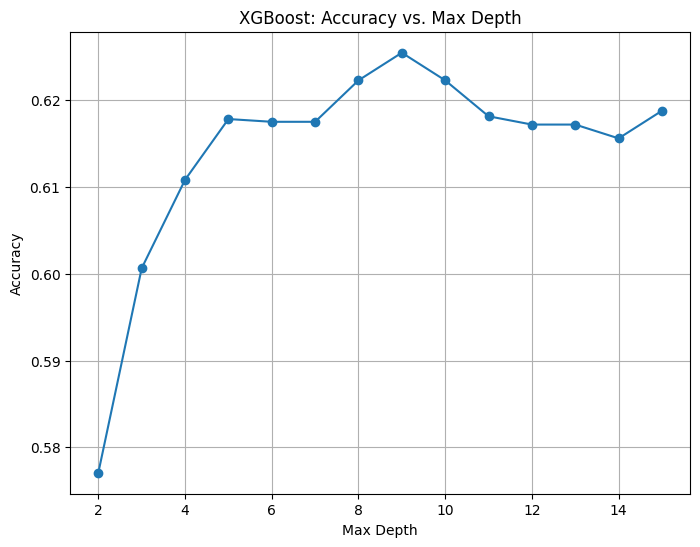

In [ ]:
# this code chunk aims to get an idea of how does tree depth influences performance to better inform my grid search
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import xgboost as xgb

# Step 1: Prepare the data
X = data_train_processed.drop(columns=['price'])  # Features
y = data_train_processed['price']  # Target variable

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_params = {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 150, 'subsample': 0.9}
# Define a range of max_depth values
max_depth_range = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
accuracy_scores = []

for depth in max_depth_range:
    model = xgb.XGBClassifier(
        n_estimators=best_params['n_estimators'],
        max_depth=depth,
        learning_rate=best_params['learning_rate'],
        subsample=best_params['subsample'],
        colsample_bytree=best_params['colsample_bytree'],
        eval_metric='mlogloss',
        use_label_encoder=False,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(max_depth_range, accuracy_scores, marker='o')
plt.title('XGBoost: Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
# Step 5: Get the best parameters
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import xgboost as xgb
import time

# Step 1: Prepare the data
X = data_train_processed.drop(columns=['price'])  # Features
y = data_train_processed['price']  # Target variable

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_params = {'colsample_bytree': 0.8, 'learning_rate': 0.07, 'max_depth': 10, 'n_estimators': 250, 'subsample': 0.7}
print("Best parameters found: ", best_params)

# Step 6: Refit the model with the best parameters
best_model_XGB = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='mlogloss')
start_time = time.process_time()
best_model_XGB.fit(X_train, y_train)
end_time = time.process_time()

cpu_time_best_model = end_time - start_time
print(f"XGBoost best model training CPU time: {cpu_time_best_model:.2f} seconds")

# Step 7: Evaluate the model
y_pred = best_model_XGB.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.07, 'max_depth': 10, 'n_estimators': 250, 'subsample': 0.7}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:27:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost best model training CPU time: 359.82 seconds
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       540
           1       0.57      0.66      0.61       524
           2       0.48      0.44      0.46       513
           3       0.50      0.54      0.52       556
           4       0.56      0.48      0.52       463
           5       0.81      0.80      0.80       544

    accuracy                           0.63      3140
   macro avg       0.63      0.63      0.63      3140
weighted avg       0.63      0.63      0.63      3140



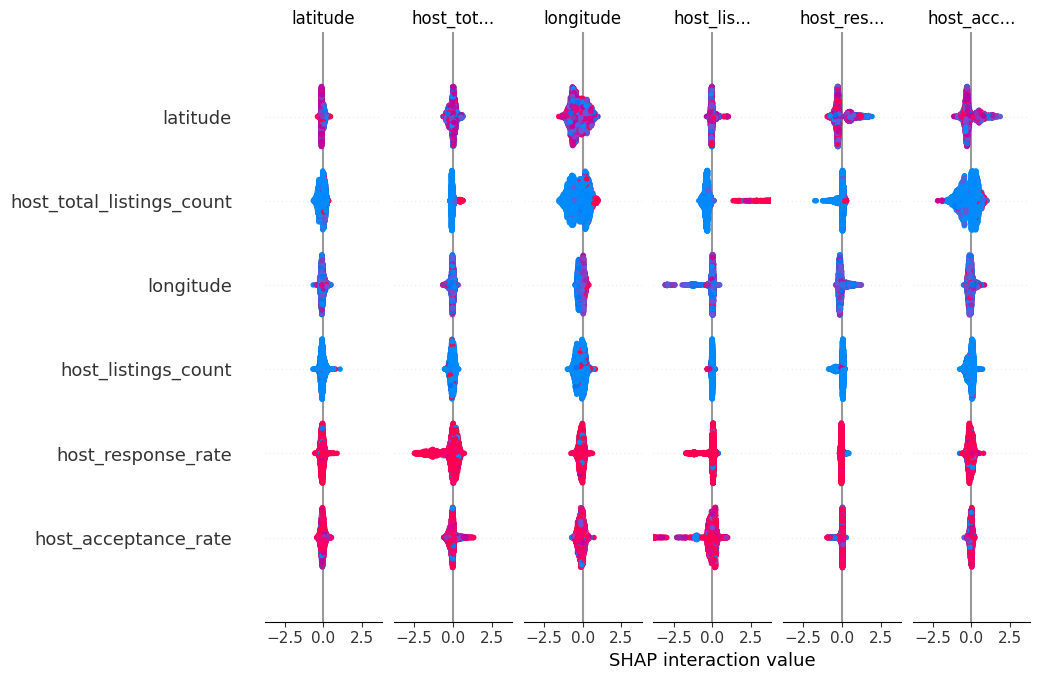

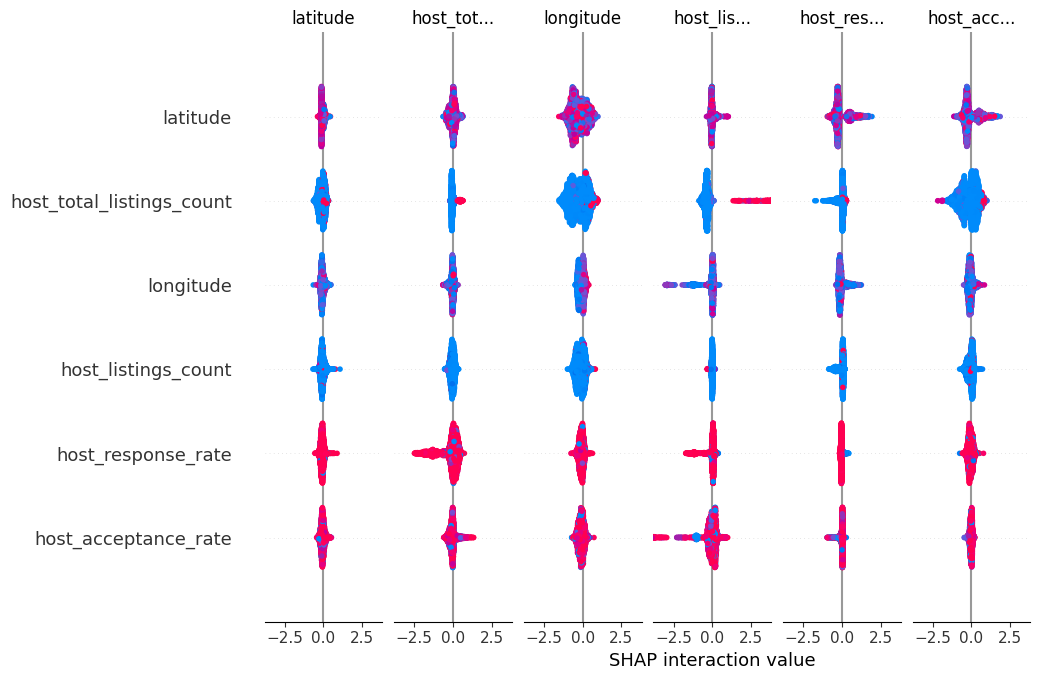

In [ ]:
# try to get a sense of feature significance of the best XGboost model using shapley value
import shap

shap.initjs()

# Use TreeExplainer for tree-based models
explainer = shap.TreeExplainer(best_model_XGB)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

In [ ]:
# fit additional model with varying hyperparameters for emsembling purposes
# Step 5: Get the best parameters
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import xgboost as xgb

# Step 1: Prepare the data
X = data_train_processed.drop(columns=['price'])  # Features
y = data_train_processed['price']  # Target variable

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_params = {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 150, 'subsample': 0.9}
print("Best parameters found: ", best_params)

# Step 6: Refit the model with the best parameters
best_model_XGB = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='mlogloss')
best_model_XGB.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = best_model_XGB.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.07, 'max_depth': 10, 'n_estimators': 250, 'subsample': 0.7}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:19:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.84      0.85      0.84       540
           1       0.58      0.65      0.61       524
           2       0.48      0.45      0.46       513
           3       0.49      0.52      0.50       556
           4       0.54      0.45      0.49       463
           5       0.80      0.80      0.80       544

    accuracy                           0.62      3140
   macro avg       0.62      0.62      0.62      3140
weighted avg       0.62      0.62      0.62      3140



In [ ]:
# fit additional model with varying hyperparameters for emsembling purposes
# Step 5: Get the best parameters
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import xgboost as xgb

# Step 1: Prepare the data
X = data_train_processed.drop(columns=['price'])  # Features
y = data_train_processed['price']  # Target variable

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_params = {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 12, 'n_estimators': 250, 'subsample': 0.8}
print("Best parameters found: ", best_params)

# Step 6: Refit the model with the best parameters
best_model_XGB1 = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='mlogloss')
best_model_XGB1.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = best_model_XGB1.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 12, 'n_estimators': 250, 'subsample': 0.8}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:24:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.82      0.84      0.83       540
           1       0.57      0.65      0.61       524
           2       0.48      0.44      0.46       513
           3       0.48      0.50      0.49       556
           4       0.54      0.46      0.50       463
           5       0.80      0.80      0.80       544

    accuracy                           0.62      3140
   macro avg       0.62      0.62      0.62      3140
weighted avg       0.62      0.62      0.62      3140



In [ ]:
# fit additional model with varying hyperparameters for emsembling purposes, this one is done with a different objective: multi:softprob
# Step 5: Get the best parameters
best_params = {
    'colsample_bytree': 0.7,
    'learning_rate': 0.15,
    'max_depth': 8,
    'n_estimators': 250,
    'subsample': 0.8
}
print("Best parameters found: ", best_params)

# Step 6: Refit the model with the best parameters using 'multi:softmax'
num_classes = len(y_train.unique())  # Get the number of unique classes in the target
best_model_XGB2 = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class = 6,  # Specify the number of classes
    **best_params,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
best_model_XGB2.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = best_model_XGB2.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.15, 'max_depth': 8, 'n_estimators': 250, 'subsample': 0.8}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:25:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.83      0.85      0.84       540
           1       0.56      0.63      0.59       524
           2       0.47      0.43      0.45       513
           3       0.49      0.53      0.51       556
           4       0.55      0.46      0.50       463
           5       0.81      0.80      0.81       544

    accuracy                           0.62      3140
   macro avg       0.62      0.62      0.62      3140
weighted avg       0.62      0.62      0.62      3140



In [ ]:
# fit additional model with varying hyperparameters for emsembling purposes
# Step 5: Get the best parameters
best_params = {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 250, 'subsample': 0.8}
print("Best parameters found: ", best_params)

# Step 6: Refit the model with the best parameters
best_model_XGB3 = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='mlogloss')
best_model_XGB3.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = best_model_XGB3.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 250, 'subsample': 0.8}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:45:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.83      0.84      0.84       540
           1       0.58      0.64      0.61       524
           2       0.50      0.47      0.49       513
           3       0.48      0.52      0.50       556
           4       0.55      0.47      0.51       463
           5       0.82      0.79      0.80       544

    accuracy                           0.63      3140
   macro avg       0.63      0.62      0.62      3140
weighted avg       0.63      0.63      0.63      3140



In [ ]:
# fit additional model with varying hyperparameters for emsembling purposes
# Step 5: Get the best parameters
best_params = {'colsample_bytree': 0.8, 'learning_rate': 0.15, 'max_depth': 9, 'n_estimators': 350, 'subsample': 0.8}
print("Best parameters found: ", best_params)

# Step 6: Refit the model with the best parameters
best_model_XGB4 = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='mlogloss')
best_model_XGB4.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = best_model_XGB4.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.15, 'max_depth': 9, 'n_estimators': 350, 'subsample': 0.8}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:44:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.83      0.86      0.85       540
           1       0.59      0.64      0.62       524
           2       0.48      0.46      0.47       513
           3       0.49      0.52      0.51       556
           4       0.53      0.44      0.48       463
           5       0.80      0.80      0.80       544

    accuracy                           0.63      3140
   macro avg       0.62      0.62      0.62      3140
weighted avg       0.62      0.63      0.62      3140



### catboost

In [65]:
pip install catboost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Step 1: Prepare the data
X = data_train_processed.drop(columns=['price'])  # Features
y = data_train_processed['price']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define the initial CatBoostClassifier model
model = CatBoostClassifier(verbose=0)  # `verbose=0` suppresses output during training

# Step 3: Parameter tuning using GridSearchCV
param_grid = {
    'iterations': [100, 200],
    'depth': [2, 3, 4],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Step 4: Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Step 5: Refit the model with the best parameters
best_model_CB = CatBoostClassifier(**best_params, verbose=0)
best_model_CB.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = best_model_CB.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:  {'depth': 4, 'iterations': 200, 'l2_leaf_reg': 5, 'learning_rate': 0.2}
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       540
           1       0.50      0.58      0.54       524
           2       0.45      0.37      0.40       513
           3       0.48      0.53      0.50       556
           4       0.51      0.42      0.46       463
           5       0.78      0.80      0.79       544

    accuracy                           0.59      3140
   macro avg       0.58      0.58      0.58      3140
weighted avg       0.59      0.59      0.59      3140



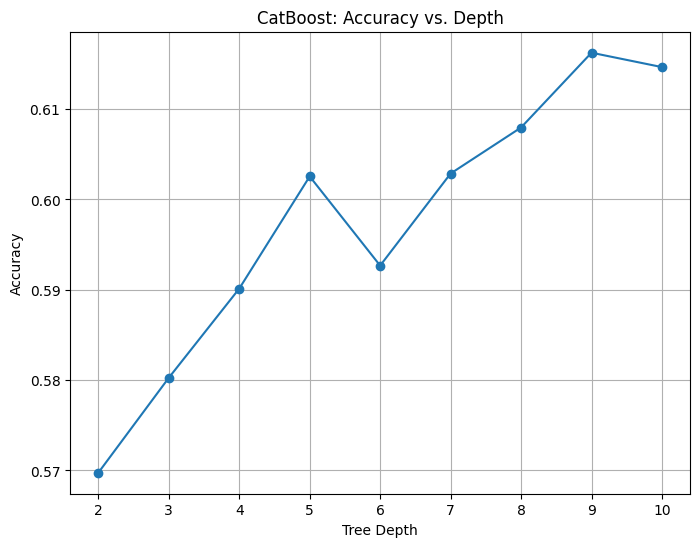

In [67]:
# visualize influence of the depth on predictive performance
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Step 1: Prepare the data
X = data_train_processed.drop(columns=['price'])  # Features
y = data_train_processed['price']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define fixed parameters
fixed_params = {
    'iterations': 200,
    'l2_leaf_reg': 5,
    'learning_rate': 0.2,
    'verbose': 0
}

# Define a range of max_depth values
depth_values = list(range(2, 11))
accuracy_scores = []

# Train models with varying depth
for depth in depth_values:
    fixed_params['depth'] = depth
    model = CatBoostClassifier(**fixed_params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(depth_values, accuracy_scores, marker='o')
plt.title('CatBoost: Accuracy vs. Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Step 4: Get the best parameters
best_params = {'depth': 4, 'iterations': 200, 'l2_leaf_reg': 5, 'learning_rate': 0.2}
print("Best parameters found: ", best_params)

# Step 5: Refit the model with the best parameters
best_model_CB = CatBoostClassifier(**best_params, verbose=0)
start_time = time.process_time()
best_model_CB .fit(X_train, y_train)
end_time = time.process_time()

cpu_time_best_model = end_time - start_time
print(f"CATBoost best model training CPU time: {cpu_time_best_model:.2f} seconds")

# Step 6: Evaluate the model
y_pred = best_model_CB.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters found:  {'depth': 4, 'iterations': 200, 'l2_leaf_reg': 5, 'learning_rate': 0.2}
CATBoost best model training CPU time: 11.52 seconds
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       540
           1       0.50      0.58      0.54       524
           2       0.45      0.37      0.40       513
           3       0.48      0.53      0.50       556
           4       0.51      0.42      0.46       463
           5       0.78      0.80      0.79       544

    accuracy                           0.59      3140
   macro avg       0.58      0.58      0.58      3140
weighted avg       0.59      0.59      0.59      3140



In [ ]:
# fit additional model with varying hyperparameters for emsembling purposes
# Step 4: Get the best parameters
best_params = {'depth': 8, 'iterations': 400, 'l2_leaf_reg': 5, 'learning_rate': 0.2}
print("Best parameters found: ", best_params)

# Step 5: Refit the model with the best parameters
best_model_CB = CatBoostClassifier(**best_params, verbose=0)
best_model_CB .fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = best_model_CB.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters found:  {'depth': 8, 'iterations': 400, 'l2_leaf_reg': 5, 'learning_rate': 0.2}
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       540
           1       0.56      0.61      0.58       524
           2       0.49      0.46      0.47       513
           3       0.49      0.53      0.51       556
           4       0.53      0.47      0.50       463
           5       0.80      0.79      0.79       544

    accuracy                           0.62      3140
   macro avg       0.62      0.61      0.61      3140
weighted avg       0.62      0.62      0.62      3140



In [ ]:
# fit additional model with varying hyperparameters for emsembling purposes
# Step 4: Get the best parameters
best_params = {'depth': 7, 'iterations': 300, 'l2_leaf_reg': 3, 'learning_rate': 0.2}
print("Best parameters found: ", best_params)

# Step 5: Refit the model with the best parameters
best_model_CB1 = CatBoostClassifier(**best_params, verbose=0)
best_model_CB1.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = best_model_CB1.predict(X_test)
print(classification_report(y_test, y_pred))

# Compute overall accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print overall accuracy
print(f"Overall Accuracy: {accuracy:.4f}")

Best parameters found:  {'depth': 7, 'iterations': 300, 'l2_leaf_reg': 3, 'learning_rate': 0.2}
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       540
           1       0.54      0.62      0.58       524
           2       0.49      0.42      0.45       513
           3       0.50      0.56      0.53       556
           4       0.55      0.46      0.50       463
           5       0.81      0.79      0.80       544

    accuracy                           0.62      3140
   macro avg       0.62      0.61      0.61      3140
weighted avg       0.62      0.62      0.62      3140

Overall Accuracy: 0.6185


In [ ]:
# fit additional model with varying hyperparameters for emsembling purposes
# Step 4: Get the best parameters
best_params = {'depth': 7, 'iterations': 300, 'l2_leaf_reg': 3, 'learning_rate': 0.1}
print("Best parameters found: ", best_params)

# Step 5: Refit the model with the best parameters
best_model_CB2 = CatBoostClassifier(**best_params, verbose=0)
best_model_CB2.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = best_model_CB2.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters found:  {'depth': 7, 'iterations': 300, 'l2_leaf_reg': 3, 'learning_rate': 0.1}
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       540
           1       0.54      0.63      0.58       524
           2       0.51      0.43      0.46       513
           3       0.51      0.57      0.54       556
           4       0.54      0.44      0.49       463
           5       0.80      0.81      0.81       544

    accuracy                           0.62      3140
   macro avg       0.62      0.62      0.61      3140
weighted avg       0.62      0.62      0.62      3140



In [ ]:
# fit additional model with varying hyperparameters for emsembling purposes
# Step 4: Get the best parameters
best_params = {'depth': 7, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
print("Best parameters found: ", best_params)

# Step 5: Refit the model with the best parameters
best_model_CB3 = CatBoostClassifier(**best_params, verbose=0)
best_model_CB3.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = best_model_CB3.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters found:  {'depth': 7, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       540
           1       0.54      0.64      0.59       524
           2       0.50      0.43      0.46       513
           3       0.50      0.53      0.52       556
           4       0.54      0.48      0.50       463
           5       0.81      0.79      0.80       544

    accuracy                           0.62      3140
   macro avg       0.62      0.62      0.62      3140
weighted avg       0.62      0.62      0.62      3140



In [ ]:
# fit additional model with varying hyperparameters for emsembling purposes
# Step 4: Get the best parameters
best_params = {'depth': 9, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
print("Best parameters found: ", best_params)

# Step 5: Refit the model with the best parameters
best_model_CB4 = CatBoostClassifier(**best_params, verbose=0)
best_model_CB4.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = best_model_CB4.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters found:  {'depth': 9, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       540
           1       0.54      0.62      0.58       524
           2       0.48      0.44      0.46       513
           3       0.49      0.54      0.51       556
           4       0.56      0.46      0.51       463
           5       0.82      0.80      0.81       544

    accuracy                           0.62      3140
   macro avg       0.62      0.61      0.61      3140
weighted avg       0.62      0.62      0.62      3140



### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Step 1: Prepare the data
X = data_train_processed.drop(columns=['price'])  # Features
y = data_train_processed['price']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define the initial Random Forest model
model = RandomForestClassifier(random_state=42)

# Step 3: Parameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 7, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Step 4: Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Step 5: Refit the model with the best parameters
best_model_RF = RandomForestClassifier(**best_params, random_state=42)
best_model_RF.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = best_model_RF.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 162 candidates, totalling 810 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:  {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       540
           1       0.55      0.68      0.61       524
           2       0.51      0.41      0.46       513
           3       0.50      0.55      0.53       556
           4       0.57      0.48      0.52       463
           5       0.82      0.79      0.81       544

    accuracy                           0.63      3140
   macro avg       0.63      0.63      0.63      3140
weighted avg       0.63      0.63      0.63      3140



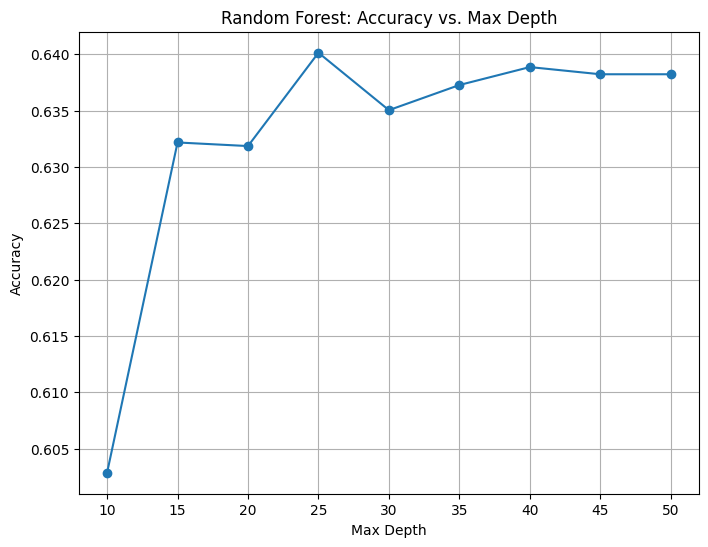

In [68]:
# see how does depth influence the predictive performance
# Define fixed parameters
best_params = {
    'bootstrap': False,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 300
}

# Define a range of max_depth values
max_depth_values = list(range(10, 51, 5))  # Testing depths from 10 to 50 in steps of 5
accuracy_scores = []

# Train models with varying max_depth
for depth in max_depth_values:
    model = RandomForestClassifier(max_depth=depth, random_state=42, **best_params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(max_depth_values, accuracy_scores, marker='o')
plt.title('Random Forest: Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Step 4: Get the best parameters
best_params = {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
print("Best parameters found: ", best_params)

# Step 5: Refit the model with the best parameters
best_model_RF = RandomForestClassifier(**best_params, random_state=42)
start_time = time.process_time()
best_model_RF.fit(X_train, y_train)
end_time = time.process_time()

cpu_time_best_model = end_time - start_time
print(f"Random Forest best model training CPU time: {cpu_time_best_model:.2f} seconds")

# Step 6: Evaluate the model
y_pred = best_model_RF.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters found:  {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest best model training CPU time: 16.05 seconds
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       540
           1       0.55      0.68      0.61       524
           2       0.51      0.41      0.46       513
           3       0.50      0.55      0.53       556
           4       0.57      0.48      0.52       463
           5       0.82      0.79      0.81       544

    accuracy                           0.63      3140
   macro avg       0.63      0.63      0.63      3140
weighted avg       0.63      0.63      0.63      3140



In [ ]:
# fit additional model with varying hyperparameters for emsembling purposes
# Step 4: Get the best parameters
best_params = {'bootstrap': False, 'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
print("Best parameters found: ", best_params)

# Step 5: Refit the model with the best parameters
best_model_RF1 = RandomForestClassifier(**best_params, random_state=42)
best_model_RF1.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = best_model_RF1.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters found:  {'bootstrap': False, 'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       540
           1       0.55      0.68      0.61       524
           2       0.52      0.43      0.47       513
           3       0.52      0.55      0.54       556
           4       0.57      0.49      0.53       463
           5       0.83      0.80      0.81       544

    accuracy                           0.64      3140
   macro avg       0.64      0.63      0.63      3140
weighted avg       0.64      0.64      0.64      3140



In [ ]:
# fit additional model with varying hyperparameters for emsembling purposes
# Step 4: Get the best parameters
best_params = {'bootstrap': False, 'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
print("Best parameters found: ", best_params)

# Step 5: Refit the model with the best parameters
best_model_RF2 = RandomForestClassifier(**best_params, random_state=42)
best_model_RF2.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = best_model_RF2.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters found:  {'bootstrap': False, 'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       540
           1       0.56      0.69      0.62       524
           2       0.53      0.42      0.47       513
           3       0.50      0.56      0.53       556
           4       0.58      0.49      0.53       463
           5       0.83      0.80      0.81       544

    accuracy                           0.64      3140
   macro avg       0.64      0.63      0.63      3140
weighted avg       0.64      0.64      0.64      3140



In [ ]:
# fit additional model with varying hyperparameters for emsembling purposes
# Step 4: Get the best parameters
best_params = {'bootstrap': False, 'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}
print("Best parameters found: ", best_params)

# Step 5: Refit the model with the best parameters
best_model_RF3 = RandomForestClassifier(**best_params, random_state=42)
best_model_RF3.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = best_model_RF3.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters found:  {'bootstrap': False, 'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       540
           1       0.56      0.69      0.62       524
           2       0.51      0.42      0.46       513
           3       0.51      0.55      0.53       556
           4       0.58      0.49      0.53       463
           5       0.83      0.80      0.81       544

    accuracy                           0.64      3140
   macro avg       0.64      0.63      0.63      3140
weighted avg       0.64      0.64      0.64      3140



In [ ]:
# fit additional model with varying hyperparameters for emsembling purposes
# Step 4: Get the best parameters
best_params = {'bootstrap': False, 'max_depth': 60, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
print("Best parameters found: ", best_params)

# Step 5: Refit the model with the best parameters
best_model_RF4 = RandomForestClassifier(**best_params, random_state=42)
best_model_RF4.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = best_model_RF4.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters found:  {'bootstrap': False, 'max_depth': 60, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       540
           1       0.55      0.68      0.61       524
           2       0.52      0.43      0.47       513
           3       0.51      0.54      0.53       556
           4       0.57      0.49      0.53       463
           5       0.82      0.80      0.81       544

    accuracy                           0.64      3140
   macro avg       0.63      0.63      0.63      3140
weighted avg       0.64      0.64      0.63      3140



### lightGBM

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Step 1: Prepare the data
X = data_train_processed.drop(columns=['price'])  # Features
y = data_train_processed['price']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define the initial LightGBM model
model = lgb.LGBMClassifier(random_state=42)

# Step 3: Parameter tuning using GridSearchCV
param_grid = {
    'num_leaves': [31, 50, 100],        # Controls the number of leaves in a tree
    'max_depth': [10, 20, 30],          # Maximum depth of the tree (-1 means no limit)
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'n_estimators': [100, 200, 300],    # Number of boosting iterations
    'subsample': [0.8, 1.0],            # Fraction of data used for training
    'colsample_bytree': [0.8, 1.0]      # Fraction of features used per tree
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Step 4: Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Step 5: Refit the model with the best parameters
best_model_LGBM = lgb.LGBMClassifier(**best_params, random_state=42)
best_model_LGBM.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = best_model_LGBM.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4585
[LightGBM] [Info] Number of data points in the train set: 10044, number of used features: 114
[LightGBM] [Info] Start training from score -1.762328
[LightGBM] [Info] Start training from score -1.760590
[LightGBM] [Info] Start training from score -1.823932
[LightGBM] [Info] Start training from score -1.729239
[LightGBM] [Info] Start training from score -1.877794
[LightGBM] [Info] Start training from score -1.803779
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003549 sec

KeyboardInterrupt: 

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Step 4: Get the best parameters
best_params = {'num_leaves': 50, 'max_depth': 30, 'learning_rate': 0.1, 'n_estimators': 200, 'subsample': 0.9,'colsample_bytree': 0.9}
print("Best parameters found: ", best_params)

# Step 5: Refit the model with the best parameters
best_model_LGBM = lgb.LGBMClassifier(**best_params, random_state=42)
start_time = time.process_time()
best_model_LGBM.fit(X_train, y_train)

end_time = time.process_time()

cpu_time_best_model = end_time - start_time
print(f"LightGBM best model training CPU time: {cpu_time_best_model:.2f} seconds")
# Step 6: Evaluate the model
y_pred = best_model_LGBM.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Best parameters found:  {'num_leaves': 50, 'max_depth': 30, 'learning_rate': 0.1, 'n_estimators': 200, 'subsample': 0.9, 'colsample_bytree': 0.9}
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4652
[LightGBM] [Info] Number of data points in the train set: 12556, number of used features: 115
[LightGBM] [Info] Start training from score -1.762408
[LightGBM] [Info] Start training from score -1.760553
[LightGBM] [Info] Start training from score -1.823642
[LightGBM] [Info] Start training from score -1.729094
[LightGBM] [Info] Start training from score -1.877873
[LightGBM] [Info] Start training from score -1.804100
LightGBM best model training CPU time: 24.53 seconds
              precision    recall  f1-score

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4652
[LightGBM] [Info] Number of data points in the train set: 12556, number of used features: 115
[LightGBM] [Info] Start training from score -1.762408
[LightGBM] [Info] Start training from score -1.760553
[LightGBM] [Info] Start training from score -1.823642
[LightGBM] [Info] Start training from score -1.729094
[LightGBM] [Info] Start training from score -1.877873
[LightGBM] [Info] Start training from score -1.804100
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

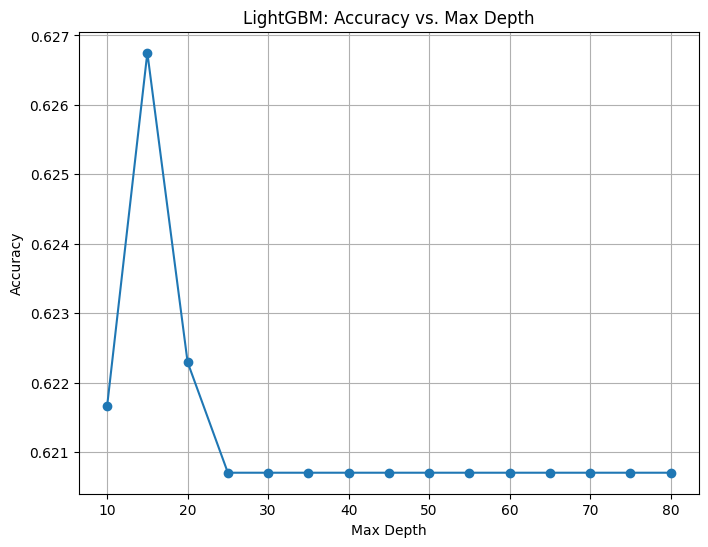

In [69]:
# Define fixed parameters
best_params = {
    'num_leaves': 50,
    'learning_rate': 0.1,
    'n_estimators': 200,
    'subsample': 0.9,
    'colsample_bytree': 0.9
}

# Define a range of max_depth values
max_depth_values = list(range(10, 81, 5))  # Testing depths from 10 to 50 in steps of 5
accuracy_scores = []

# Train models with varying max_depth
for depth in max_depth_values:
    model = lgb.LGBMClassifier(max_depth=depth, random_state=42, **best_params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(max_depth_values, accuracy_scores, marker='o')
plt.title('LightGBM: Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
# fit additional model with varying hyperparameters for emsembling purposes
# Step 4: Get the best parameters
best_params = {'num_leaves': 100, 'max_depth': 50, 'learning_rate': 0.2, 'n_estimators': 200, 'subsample': 0.9,'colsample_bytree': 0.9}
print("Best parameters found: ", best_params)

# Step 5: Refit the model with the best parameters
best_model_LGBM1 = lgb.LGBMClassifier(**best_params, random_state=42)
best_model_LGBM1.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = best_model_LGBM1.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters found:  {'num_leaves': 100, 'max_depth': 50, 'learning_rate': 0.2, 'n_estimators': 200, 'subsample': 0.9, 'colsample_bytree': 0.9}
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005013 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4644
[LightGBM] [Info] Number of data points in the train set: 12556, number of used features: 111
[LightGBM] [Info] Start training from score -1.762408
[LightGBM] [Info] Start training from score -1.760553
[LightGBM] [Info] Start training from score -1.823642
[LightGBM] [Info] Start training from score -1.729094
[LightGBM] [Info] Start training from score -1.877873
[LightGBM] [Info] Start training from score -1.804100
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

In [ ]:
# fit additional model with varying hyperparameters for emsembling purposes
# Step 4: Get the best parameters
best_params = {'num_leaves': 100, 'max_depth': 60, 'learning_rate': 0.1, 'n_estimators': 300, 'subsample': 0.9,'colsample_bytree': 0.9}
print("Best parameters found: ", best_params)

# Step 5: Refit the model with the best parameters
best_model_LGBM2 = lgb.LGBMClassifier(**best_params, random_state=42)
best_model_LGBM2.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = best_model_LGBM2.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters found:  {'num_leaves': 100, 'max_depth': 60, 'learning_rate': 0.1, 'n_estimators': 300, 'subsample': 0.9, 'colsample_bytree': 0.9}
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4644
[LightGBM] [Info] Number of data points in the train set: 12556, number of used features: 111
[LightGBM] [Info] Start training from score -1.762408
[LightGBM] [Info] Start training from score -1.760553
[LightGBM] [Info] Start training from score -1.823642
[LightGBM] [Info] Start training from score -1.729094
[LightGBM] [Info] Start training from score -1.877873
[LightGBM] [Info] Start training from score -1.804100
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       540
           1       0.57      0.66      0.61       

In [ ]:
# fit additional model with varying hyperparameters for emsembling purposes
# Step 4: Get the best parameters
best_params = {'num_leaves': 150, 'max_depth': 100, 'learning_rate': 0.2, 'n_estimators': 200, 'subsample': 0.9,'colsample_bytree': 0.9}
print("Best parameters found: ", best_params)

# Step 5: Refit the model with the best parameters
best_model_LGBM3 = lgb.LGBMClassifier(**best_params, random_state=42)
best_model_LGBM3.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = best_model_LGBM3.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters found:  {'num_leaves': 150, 'max_depth': 100, 'learning_rate': 0.2, 'n_estimators': 200, 'subsample': 0.9, 'colsample_bytree': 0.9}
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4644
[LightGBM] [Info] Number of data points in the train set: 12556, number of used features: 111
[LightGBM] [Info] Start training from score -1.762408
[LightGBM] [Info] Start training from score -1.760553
[LightGBM] [Info] Start training from score -1.823642
[LightGBM] [Info] Start training from score -1.729094
[LightGBM] [Info] Start training from score -1.877873
[LightGBM] [Info] Start training from score -1.804100
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

In [ ]:
# fit additional model with varying hyperparameters for emsembling purposes
# Step 4: Get the best parameters
best_params = {'num_leaves': 150, 'max_depth': 80, 'learning_rate': 0.15, 'n_estimators': 400, 'subsample': 0.9,'colsample_bytree': 0.9}
print("Best parameters found: ", best_params)

# Step 5: Refit the model with the best parameters
best_model_LGBM4 = lgb.LGBMClassifier(**best_params, random_state=42)
best_model_LGBM4.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = best_model_LGBM4.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters found:  {'num_leaves': 150, 'max_depth': 80, 'learning_rate': 0.15, 'n_estimators': 400, 'subsample': 0.9, 'colsample_bytree': 0.9}
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4644
[LightGBM] [Info] Number of data points in the train set: 12556, number of used features: 111
[LightGBM] [Info] Start training from score -1.762408
[LightGBM] [Info] Start training from score -1.760553
[LightGBM] [Info] Start training from score -1.823642
[LightGBM] [Info] Start training from score -1.729094
[LightGBM] [Info] Start training from score -1.877873
[LightGBM] [Info] Start training from score -1.804100
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

### final emsemble model

In [ ]:
# see what is wrong with the output formatting, cat boost is problematic
for name, model in [('xgb', best_model_XGB1), ('cat', best_model_CB1), ('rf', best_model_RF), ('lgb', best_model_LGBM1)]:
    try:
        preds = model.predict(X_test)
        print(f"{name} predictions shape: {preds.shape}, example: {preds[:5]}")
    except Exception as e:
        print(f"Error with {name}: {e}")

xgb predictions shape: (3140,), example: [2 3 1 4 1]
cat predictions shape: (3140, 1), example: [[1]
 [3]
 [1]
 [4]
 [1]]
rf predictions shape: (3140,), example: [1 3 1 4 1]
lgb predictions shape: (3140,), example: [1 3 1 4 1]


In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

# Custom wrapper for CatBoostClassifier, to address the dimensionality problem
class WrappedCatBoost(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        # Flatten the prediction to my desired shape
        return self.model.predict(X).flatten()

# Wrap the CatBoost models
wrapped_cat_model = WrappedCatBoost(best_model_CB)
wrapped_cat_model1 = WrappedCatBoost(best_model_CB1)
wrapped_cat_model2 = WrappedCatBoost(best_model_CB2)
wrapped_cat_model3 = WrappedCatBoost(best_model_CB3)
wrapped_cat_model4 = WrappedCatBoost(best_model_CB4)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report

# Step 1: base models
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# Step 2: VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[
        ('xgb', best_model_XGB),
        ('xgb1', best_model_XGB1),
        ('xgb2', best_model_XGB2),
        ('xgb3', best_model_XGB3),
        ('xgb4', best_model_XGB4),
        ('cat', wrapped_cat_model),
        ('cat1', wrapped_cat_model1),
        ('cat2', wrapped_cat_model2),
        ('cat3', wrapped_cat_model3),
        ('cat4', wrapped_cat_model4),
        ('rf', best_model_RF),
        ('rf1', best_model_RF1),
        ('rf2', best_model_RF2),
        ('rf3', best_model_RF3),
        ('rf4', best_model_RF4),
        ('lgb', best_model_LGBM),
        ('lgb1', best_model_LGBM1),
        ('lgb2', best_model_LGBM2),
        ('lgb3', best_model_LGBM3),
        ('lgb4', best_model_LGBM4),
    ],
    voting='hard'  # 'hard' for majority voting;
    #'soft' for weighted probabilities, i noticed that soft does not help that much
)

# Step 3: Fit the ensemble model
ensemble_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = ensemble_model.predict(X_test)

# Step 5: Evaluate the ensemble model
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:49:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005116 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4644
[LightGBM] [Info] Number of data points in the train set: 12556, number of used features: 111
[LightGBM] [Info] Start training from score -1.762408
[LightGBM] [Info] Start training from score -1.760553
[LightGBM] [Info] Start training from score -1.823642
[LightGBM] [Info] Start training from score -1.729094
[LightGBM] [Info] Start training from score -1.877873
[LightGBM] [Info] Start training from score -1.804100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4644
[LightGBM] [Info] Number of da

In [ ]:
X_test_processed = data_test_processed.drop(columns=['id'])
X_test_processed.head()

,latitude,longitude,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,calculated_host_listings_count,calculated_host_listings_count_entire_homes,...,host_res_t_others,host_res_t_within a few hours,host_res_t_within an hour,neighbourhood_expensiveness,Length of amenities,district_Bronx,district_Brooklyn,district_Manhattan,district_Queens,district_Staten Island
0,40.744620,-73.904520,100.0,91.0,1.0,12.0,0,0,1,1,...,True,False,False,1.167883,53,False,False,False,True,False
1,40.753407,-73.934995,99.0,23.0,727.0,1336.0,0,0,719,0,...,False,False,True,2.305556,15,False,False,False,True,False
2,40.677090,-73.943810,100.0,91.0,1.0,1.0,0,0,1,1,...,True,False,False,2.056863,10,False,True,False,False,False
3,40.795760,-73.971570,70.0,37.0,36.0,79.0,0,0,36,18,...,True,False,False,3.109091,17,False,False,True,False,False
4,40.713590,-73.955400,100.0,75.0,1.0,1.0,0,0,1,1,...,False,True,False,2.800310,44,False,True,False,False,False


In [ ]:
# predict on the test set
# Step 2: Make predictions using the trained ensemble model
predicted_price = ensemble_model.predict(X_test_processed)

# Step 3: Add predictions to the original DataFrame
data_test_processed['predicted_price'] = predicted_price

# Step 4: Display the updated DataFrame with predictions
print(data_test_processed[['id', 'predicted_price']].head())

      id  predicted_price
0   3917                5
1   1885                0
2   1305                3
3  19328                1
4  16511                2


In [ ]:
# save my prediction and then i can upload to kaggle!!@!!@!@@!!
# Step 1: Prepare the final result DataFrame with 'id' and 'predicted_price'
final_result = data_test_processed[['id']]
final_result['price'] = predicted_price

# Step 2: Save the result to a CSV file
output_file_path = 'predicted_prices.csv'
final_result.to_csv(output_file_path, index=False)

print(f"Final result saved to {output_file_path}")

Final result saved to predicted_prices.csv


<ipython-input-264-fd48a57dd351>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_result['price'] = predicted_price
